Import dataset, understand the summary statistics of numeerical data features

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

resorts_data = pd.read_csv('resorts.csv', encoding="ISO-8859-1")
print(resorts_data.describe())


               ID    Latitude   Longitude       Price  Highest point  \
count  499.000000  499.000000  499.000000  499.000000     499.000000   
mean   250.000000   43.205684   -6.006784   48.721443    2160.589178   
std    144.193157   15.975790   59.990459   21.718733     774.339805   
min      1.000000  -45.054960 -149.740657    0.000000     163.000000   
25%    125.500000   43.672650    1.380975   36.000000    1594.000000   
50%    250.000000   46.347316    8.206372   45.000000    2175.000000   
75%    374.500000   47.327089   12.429237   54.000000    2700.000000   
max    499.000000   67.784406  176.876668  141.000000    3914.000000   

       Lowest point  Beginner slopes  Intermediate slopes  Difficult slopes  \
count    499.000000       499.000000           499.000000        499.000000   
mean    1200.631263        31.819639            37.921844         16.164329   
std      596.142294        47.401764            44.358524         20.115855   
min       36.000000         0.00000

Understand the dataset's number of entries and features: 499 entries and 25 features

In [ ]:
print(resorts_data.shape)

(499, 25)


Filter the dataset to obtain only the ski resorts in USA, filtered down to 78 entries.

In [ ]:
us_resorts_data = resorts_data[resorts_data['Country'] == "United States"]
print(us_resorts_data.shape)

(78, 25)


Relooking at the summary for the ski resorts in the US reveals the following on average:

*   Price is higher
*   Less beginner slopes
*   Slightly more intermediate slopes
*   Significantly more difficult slopes
*   More slopes in total
*   More snow cannons
*   Less surface lifts
*   More chair lifts
*   Less gondola lifts
*   Less total lifts



In [ ]:
print(us_resorts_data.describe())

               ID   Latitude   Longitude       Price  Highest point  \
count   78.000000  78.000000   78.000000   78.000000      78.000000   
mean   225.025641  42.182841 -104.932368   81.166667    2485.794872   
std    113.986668   5.030765   18.595649   27.842515     996.967550   
min     22.000000  32.755839 -149.740657    0.000000     594.000000   
25%    168.250000  39.176703 -119.193247   63.000000    1382.500000   
50%    215.500000  41.283015 -109.407770   79.500000    2736.000000   
75%    272.750000  45.060566  -92.974450  101.250000    3320.750000   
max    491.000000  61.103269  -70.819614  141.000000    3914.000000   

       Lowest point  Beginner slopes  Intermediate slopes  Difficult slopes  \
count     78.000000        78.000000            78.000000         78.000000   
mean    1749.474359        19.641026            38.294872         32.551282   
std      916.439691        11.881421            23.111311         23.812933   
min       70.000000         0.000000        

In [ ]:
print(us_resorts_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 21 to 490
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   78 non-null     int64  
 1   Resort               78 non-null     object 
 2   Latitude             78 non-null     float64
 3   Longitude            78 non-null     float64
 4   Country              78 non-null     object 
 5   Continent            78 non-null     object 
 6   Price                78 non-null     int64  
 7   Season               78 non-null     object 
 8   Highest point        78 non-null     int64  
 9   Lowest point         78 non-null     int64  
 10  Beginner slopes      78 non-null     int64  
 11  Intermediate slopes  78 non-null     int64  
 12  Difficult slopes     78 non-null     int64  
 13  Total slopes         78 non-null     int64  
 14  Longest run          78 non-null     int64  
 15  Snow cannons         78 non-null     int64  


Data Exploration: What is the distribution of pricing for the ski resorts?

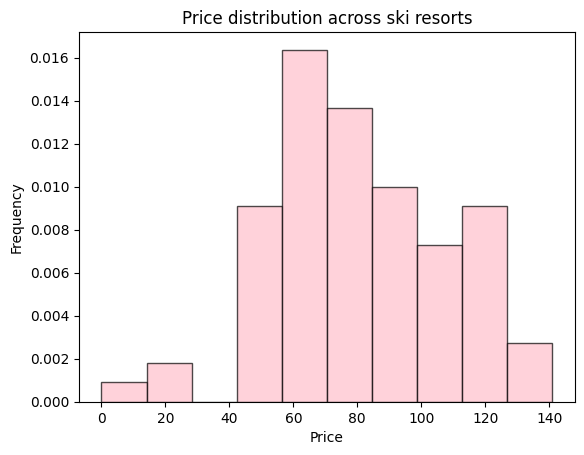

In [ ]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(us_resorts_data["Price"],
                            density = 1,
                            color ='pink',
                            alpha = 0.7,
                            edgecolor = "black")
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.title('Price distribution across ski resorts')

plt.show()


Data Exploration: What is the distribution of slopes for the ski resorts?

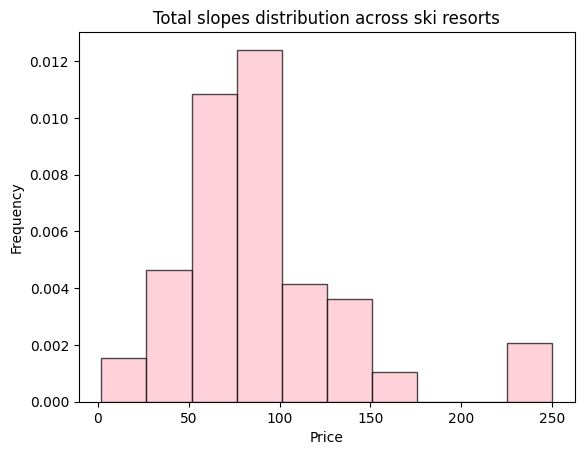

In [ ]:
n, bins, patches = plt.hist(us_resorts_data["Total slopes"],
                            density = 1,
                            color ='pink',
                            alpha = 0.7,
                            edgecolor = "black")
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.title('Total slopes distribution across ski resorts')

plt.show()

Data Exploration: Which areas have the lowest price?

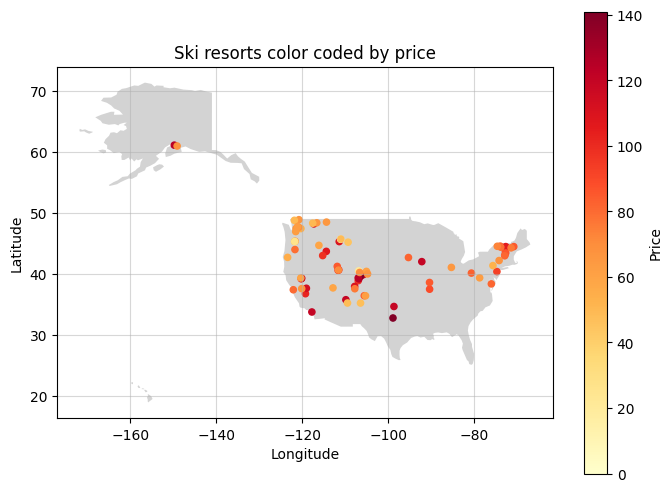

In [ ]:
import geopandas as gpd

fig, ax = plt.subplots(figsize=(8,6))
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
countries = gpd.read_file(url)
countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
us_resorts_data.plot(x="Longitude", y="Latitude", kind="scatter", c="Price", colormap="YlOrRd", ax=ax)

ax.grid(alpha=0.5)
plt.title("Ski resorts color coded by price")
plt.show()

The data exploration reveals that the lower priced ski resorts lie mostly in the northwest area of the United States, with the most expensive lying in the central area.

Data Exploration: Which areas have the most lifts?

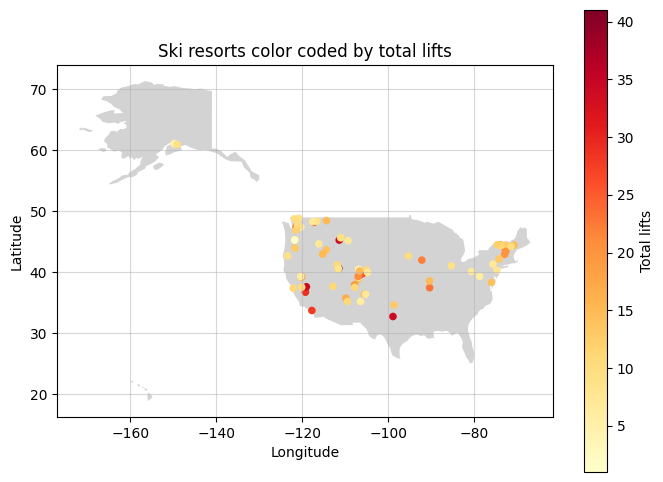

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
us_resorts_data.plot(x="Longitude", y="Latitude", kind="scatter", c="Total lifts", colormap="YlOrRd", ax=ax)

ax.grid(alpha=0.5)
plt.title("Ski resorts color coded by total lifts")
plt.show()

The data exploration reveals that the most lifts are more often in areas with higher prices too, lying in the central area and west coast.

Data Exploration: Which areas have the longest runs?

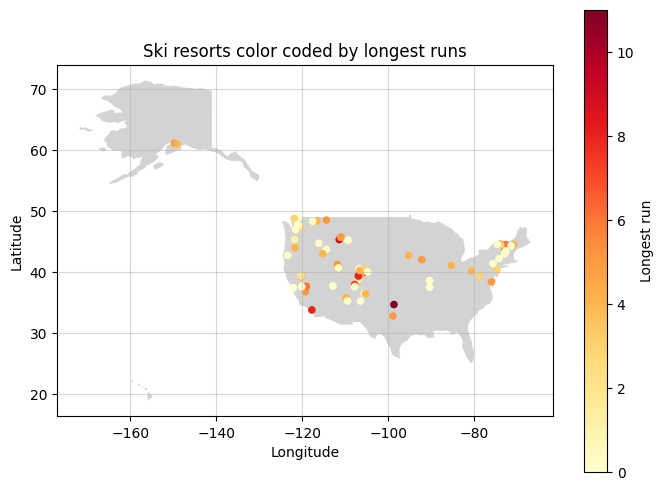

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
us_resorts_data.plot(x="Longitude", y="Latitude", kind="scatter", c="Longest run", colormap="YlOrRd", ax=ax)

ax.grid(alpha=0.5)
plt.title("Ski resorts color coded by longest runs")
plt.show()

Data Exploration: Which areas have the highest slopes?

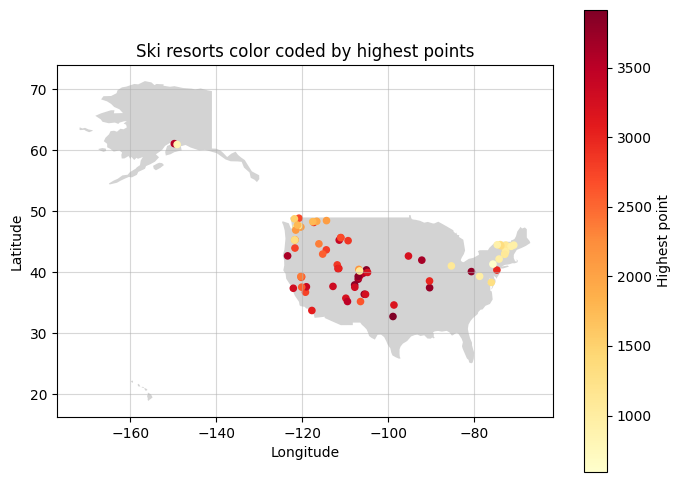

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
us_resorts_data.plot(x="Longitude", y="Latitude", kind="scatter", c="Highest point", colormap="YlOrRd", ax=ax)

ax.grid(alpha=0.5)
plt.title("Ski resorts color coded by highest points")
plt.show()

A correlation analysis between the various features of the ski resorts returned the following results.

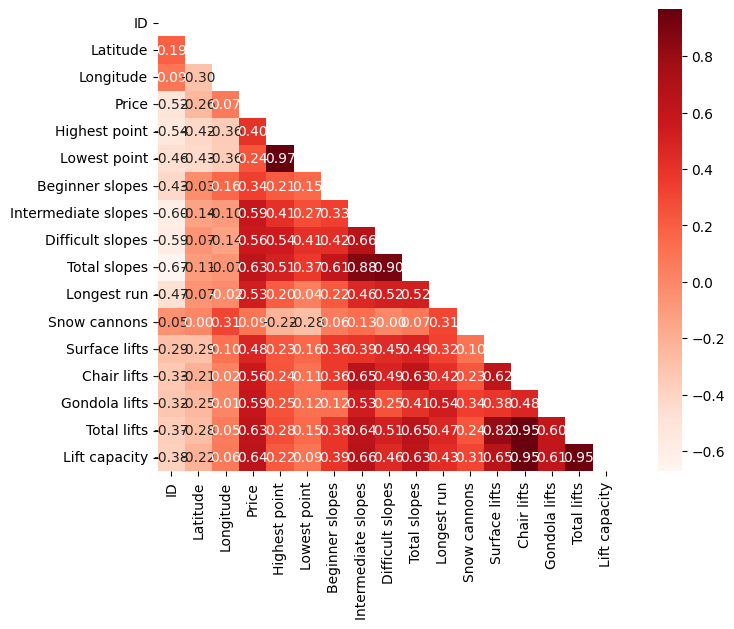

In [ ]:
import seaborn as sns
import numpy as np
#Using Pearson Correlation
corr = us_resorts_data.corr(numeric_only=True)
tri_matrix = np.triu(np.ones_like(corr))
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, mask=tri_matrix, fmt='.2f', square=True)
plt.show()

Use K means clustering to categorise the ski resorts into k distinct categories which will make it easier for understanding the major groups of ski resorts.

Streaming output truncated to the last 5000 lines.
Iteration 7, inertia 2607132193.227109.
Iteration 8, inertia 2604094283.7916007.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3235617617.0167913.
Iteration 1, inertia 2816220489.2634897.
Iteration 2, inertia 2744986743.676912.
Iteration 3, inertia 2680935224.296638.
Iteration 4, inertia 2607132193.227109.
Iteration 5, inertia 2604094283.7916007.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3115574643.974038.
Iteration 1, inertia 2621526992.1623597.
Iteration 2, inertia 2593745147.658002.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3709011970.730258.
Iteration 1, inertia 3093760726.465404.
Iteration 2, inertia 2853891533.6610837.
Iteration 3, inertia 2779565850.982016.
Iteration 4, inertia 2714165717.1406503.
Iteration 5, inertia 2658367983.671796.
Iteration 6, inertia 2607132193.227109.
Iteration 7,

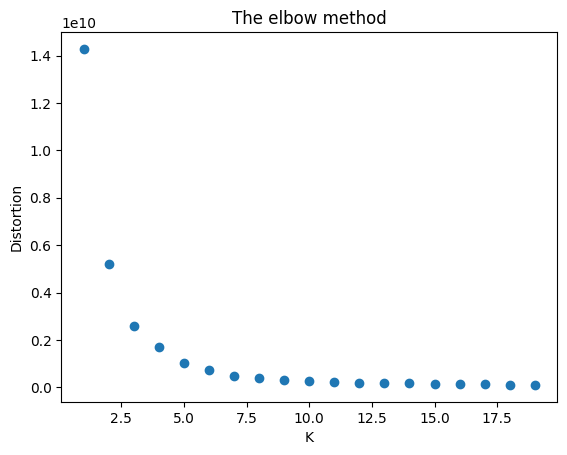

In [ ]:
from sklearn.cluster import KMeans
distortions = []

non_numeric_us_resorts_data = us_resorts_data.select_dtypes(['number'])

K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500, verbose=1)
    kmean.fit(non_numeric_us_resorts_data)
    distortions.append(kmean.inertia_)

fig_kmean = plt.scatter(x=K, y=distortions)
plt.xlabel("K")
plt.ylabel("Distortion")
plt.title("The elbow method")
plt.show()

Using the elbow method, the optimal K size is discovered to be around 3


<ipython-input-15-ed50abcf5db6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_us_resorts_data['Cluster'] = pd.Series((kmeans.labels_), index=clustered_us_resorts_data.index)


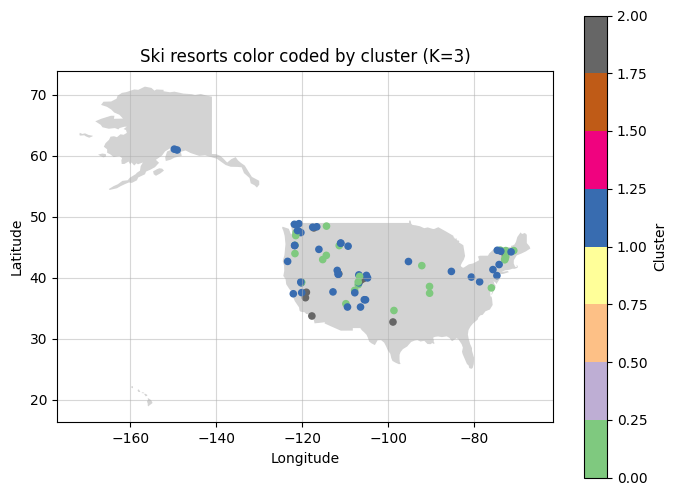

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(non_numeric_us_resorts_data)
clustered_us_resorts_data = us_resorts_data
clustered_us_resorts_data['Cluster'] = pd.Series((kmeans.labels_), index=clustered_us_resorts_data.index)

fig, ax = plt.subplots(figsize=(8,6))
countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
clustered_us_resorts_data.plot(x="Longitude", y="Latitude", kind="scatter", c="Cluster", colormap="Accent", ax=ax)
ax.grid(alpha=0.5)
plt.title("Ski resorts color coded by cluster (K=3)")
plt.show()

The clustering shows that the 3 main clusters ae divided such that cluster 2 are ski resorts concentrated on the west coast, whereas cluster 1 is the most widespread across north america and alaska. Cluster 0 is also widespread but not distributed to Alaska.

<ipython-input-16-af87a0f38440>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_us_resorts_data['Cluster'] = pd.Series((kmeans.labels_), index=clustered_us_resorts_data.index)


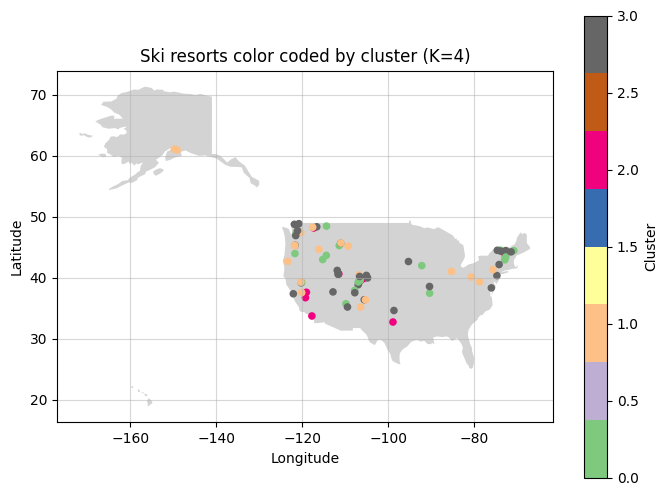

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(non_numeric_us_resorts_data)
clustered_us_resorts_data = us_resorts_data
clustered_us_resorts_data['Cluster'] = pd.Series((kmeans.labels_), index=clustered_us_resorts_data.index)

fig, ax = plt.subplots(figsize=(8,6))
countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
clustered_us_resorts_data.plot(x="Longitude", y="Latitude", kind="scatter", c="Cluster", colormap="Accent", ax=ax)
ax.grid(alpha=0.5)
plt.title("Ski resorts color coded by cluster (K=4)")
plt.show()

If a value of k=4 is chosen, then the clustering remains fairly similar. Clusters 2 and 0 remain relatively unchanged, whereas cluster 1 is split into 2 clusters now.

Next, the snow dataset is loaded to analyse the trend of snowfall over time.

In [ ]:
snow_data = pd.read_csv('snow.csv', encoding="ISO-8859-1")
print(snow_data.describe())

            Latitude      Longitude           Snow
count  820522.000000  820522.000000  820522.000000
mean       57.622848      13.285991      78.018245
std        17.121148      97.604739      36.041732
min       -55.375000    -179.875000       0.390000
25%        50.875000     -78.625000      59.450000
50%        60.625000      36.875000     100.000000
75%        67.375000      98.375000     100.000000
max        83.375000     179.875000     100.000000


In [ ]:
print(snow_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820522 entries, 0 to 820521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Month      820522 non-null  object 
 1   Latitude   820522 non-null  float64
 2   Longitude  820522 non-null  float64
 3   Snow       820522 non-null  float64
dtypes: float64(3), object(1)
memory usage: 25.0+ MB
None


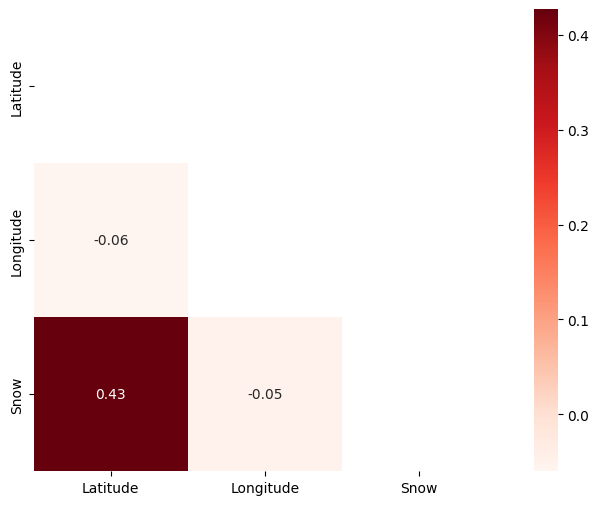

In [ ]:
import seaborn as sns
#Using Pearson Correlation
corr = snow_data.corr(numeric_only=True)
tri_matrix = np.triu(np.ones_like(corr))
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, mask=tri_matrix, fmt='.2f', square=True)
plt.show()

In [ ]:
unique_lat_coord = snow_data['Latitude'].unique()
print(unique_lat_coord)
print(len(unique_lat_coord))

[ 63.125  62.875  62.625  62.375  62.125  61.875  61.625  61.375  61.125
  60.875  60.625  60.375  60.125  59.875  59.625  59.375  59.125  58.875
  58.625  58.375  58.125  57.875  57.625  57.375  57.125  56.875  56.625
  56.375  56.125  55.875  55.625  55.375  55.125  54.875  54.625  54.375
  54.125  53.875  53.625  53.375  53.125  52.875  52.625  52.375  52.125
  51.875  51.625  51.375  51.125  50.875  50.625  50.375  50.125  49.875
  49.625  49.375  49.125  48.875  48.625  48.375  48.125  47.875  47.625
  47.375  47.125  46.875  46.625  46.375  46.125  45.875  45.625  45.375
  45.125  44.875  44.625  44.375  44.125  43.875  43.625  43.375  43.125
  42.875  42.625  42.375  42.125  41.875  41.625  41.375  41.125  40.875
  40.625  40.375  40.125  39.875  39.625  39.375  39.125  38.875  38.625
  38.375  38.125  37.875  37.625  37.375  37.125  36.875  36.625  36.375
  36.125  35.875  35.625  35.375  35.125  34.875  34.625  34.375  34.125
  33.875  33.625  33.375  33.125  32.875  32.625  3

In [ ]:
unique_long_coord = snow_data['Longitude'].unique()
print(unique_long_coord)
print(len(unique_long_coord))

[  68.875   69.125   69.375 ...  -27.375  -13.625 -168.375]
1424


In [ ]:
unique_months = snow_data['Month'].unique()
print(unique_months)
print(len(unique_months))

['2022-12-01' '2022-11-01' '2022-10-01' '2022-09-01' '2022-08-01'
 '2022-07-01' '2022-06-01' '2022-05-01' '2022-04-01' '2022-03-01'
 '2022-02-01' '2022-01-01']
12


First, filter the snow data to only that measured in the US.

In [ ]:
# Reference: https://latitudelongitude.org/us/
us_snow_data = snow_data[snow_data["Latitude"] <= 64.85694]
us_snow_data = us_snow_data[us_snow_data["Latitude"] >= 19.50139]
us_snow_data = us_snow_data[us_snow_data["Longitude"] <= -68.01197]
us_snow_data = us_snow_data[us_snow_data["Longitude"] >= -161.75583]
print(us_snow_data.shape)


(154036, 4)


In [ ]:
unique_us_lat_coord = us_snow_data['Latitude'].unique()
print(unique_us_lat_coord)
print(len(unique_us_lat_coord))

[62.875 62.625 62.375 62.125 61.875 61.625 61.375 61.125 60.875 60.625
 60.375 60.125 59.875 59.625 59.375 59.125 58.875 58.625 58.375 58.125
 57.875 57.625 57.375 57.125 56.875 56.625 56.375 56.125 55.875 55.625
 55.375 55.125 54.875 54.625 54.375 54.125 53.875 53.625 53.375 53.125
 52.875 52.625 52.375 52.125 51.875 51.625 51.375 51.125 50.875 50.625
 50.375 50.125 49.875 49.625 49.375 49.125 48.875 48.625 48.375 48.125
 47.875 47.625 47.375 47.125 46.875 46.625 46.375 46.125 45.875 45.625
 45.375 45.125 44.875 44.625 44.375 44.125 43.875 43.625 43.375 43.125
 42.875 42.625 42.375 42.125 41.875 41.625 41.375 41.125 40.875 40.625
 40.375 40.125 39.875 39.625 39.375 39.125 38.875 38.625 38.375 38.125
 37.875 37.625 37.375 37.125 36.875 36.625 36.375 36.125 35.875 35.625
 35.375 35.125 34.875 34.625 34.375 34.125 33.875 33.625 33.375 33.125
 32.875 32.625 32.375 32.125 31.875 31.625 31.375 31.125 30.875 30.625
 30.375 30.125 29.875 29.625 29.375 29.125 28.125 27.875 27.625 27.125
 25.62

In [ ]:
unique_us_long_coord = us_snow_data['Longitude'].unique()
print(unique_us_long_coord)
print(len(unique_us_long_coord))

[-158.125 -157.875 -157.625 -157.375 -157.125 -156.875 -156.625 -156.375
 -156.125 -155.875 -155.625 -155.375 -155.125 -154.875 -154.625 -154.375
 -154.125 -153.875 -153.625 -153.375 -153.125 -152.875 -152.625 -152.375
 -152.125 -151.875 -151.625 -151.125 -150.625 -149.875 -149.625 -149.375
 -148.375 -148.125 -147.375 -147.125 -146.875 -146.625 -145.875 -145.625
 -145.375 -145.125 -144.875 -144.625 -143.875 -143.625 -143.375 -143.125
 -142.625 -142.375 -142.125 -133.875 -133.625 -133.375 -133.125 -132.875
 -132.625 -132.375 -132.125 -131.875 -131.625 -131.375 -131.125 -130.875
 -130.625 -130.375 -130.125 -129.875 -129.625 -129.375 -129.125 -128.875
 -128.125 -127.625 -127.375 -127.125 -126.375 -125.625 -125.375 -125.125
 -124.875 -123.875 -123.375 -119.375 -118.875 -117.625 -116.625 -116.375
 -115.875 -115.625 -115.375 -115.125 -114.875 -114.125 -113.125 -112.375
 -108.875 -108.625 -108.375 -108.125 -104.125 -102.875 -102.375 -102.125
  -96.625  -93.625  -93.375  -93.125  -70.625  -69.

Next, to visualise the distribution of snowfall over the US over the period of 1 year in 2022.

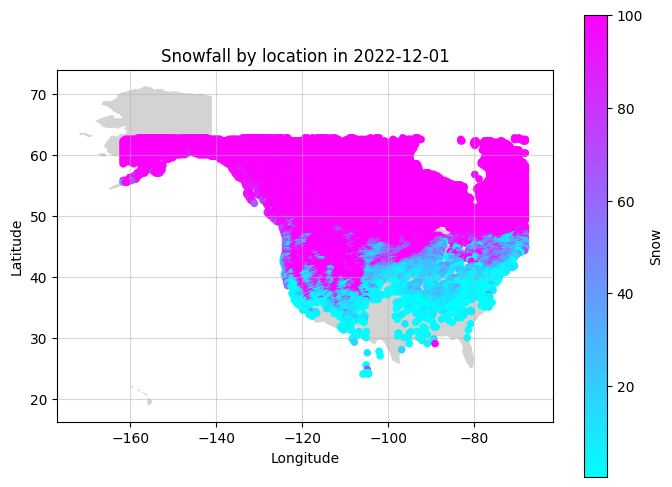

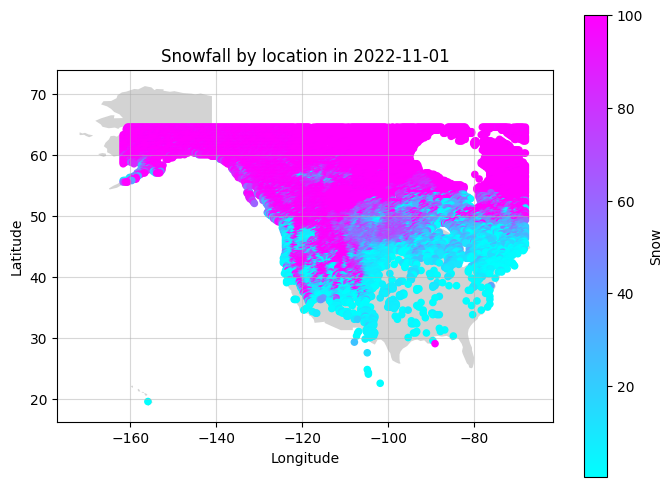

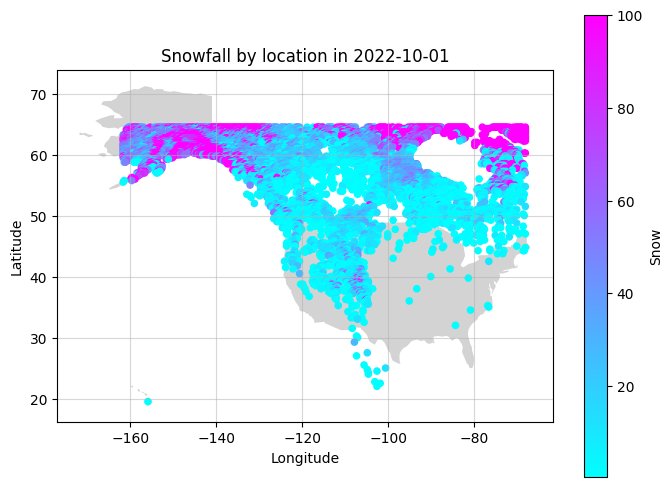

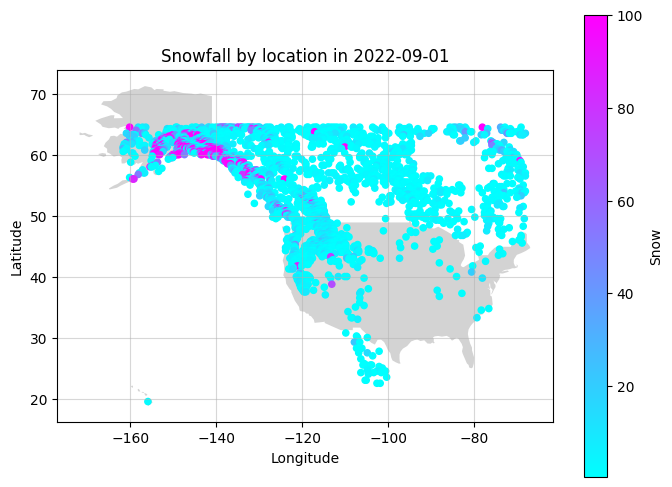

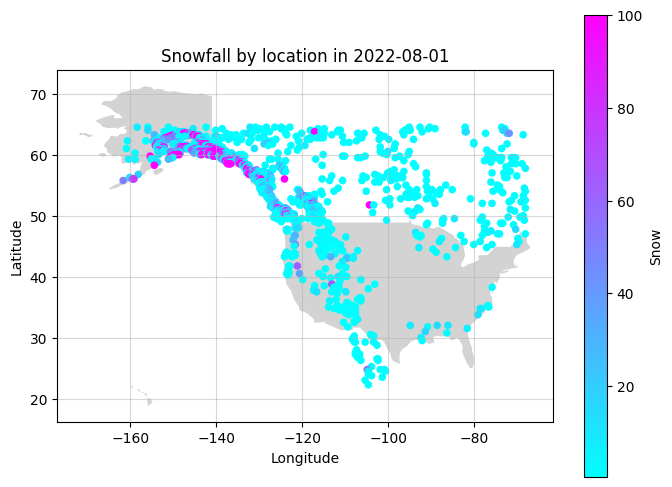

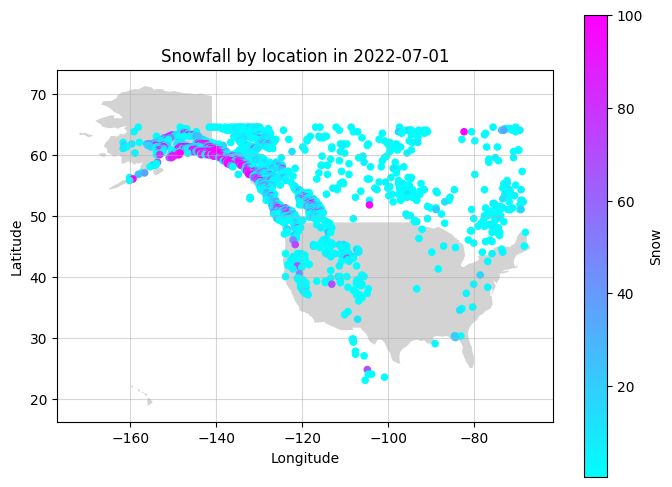

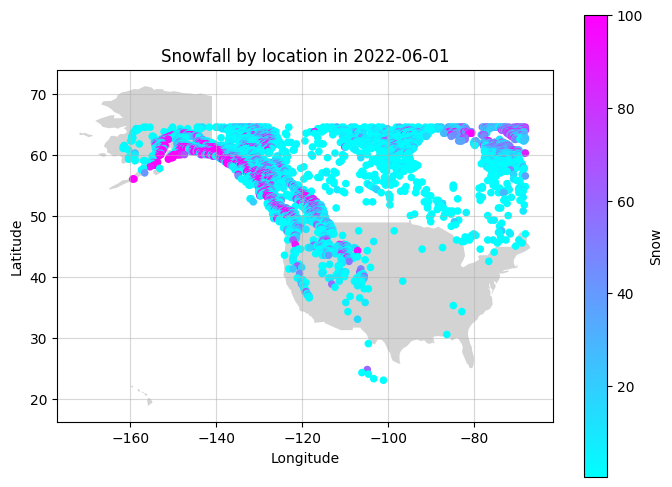

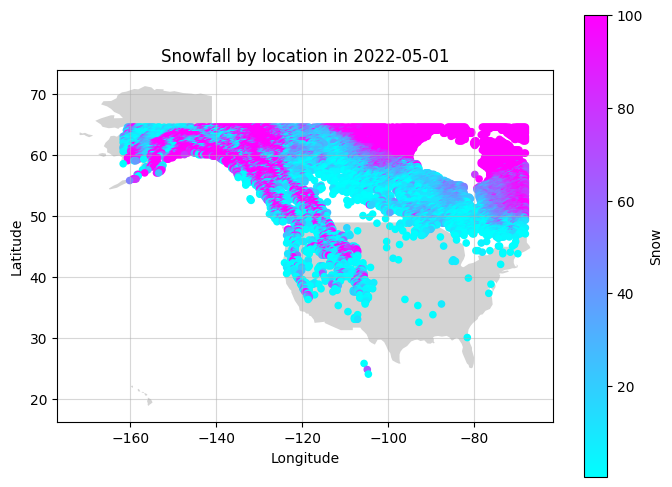

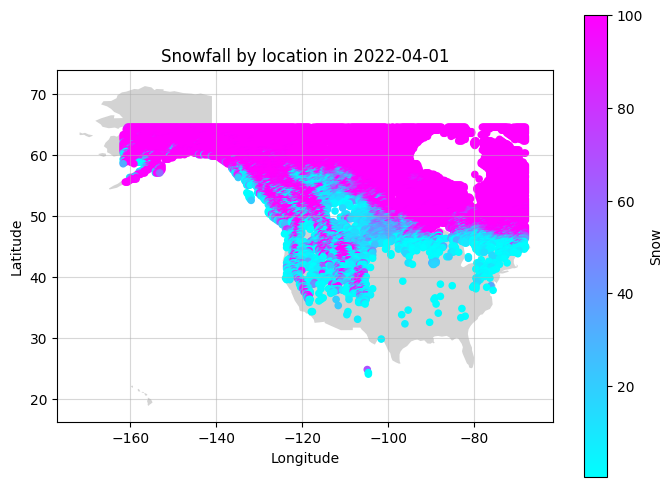

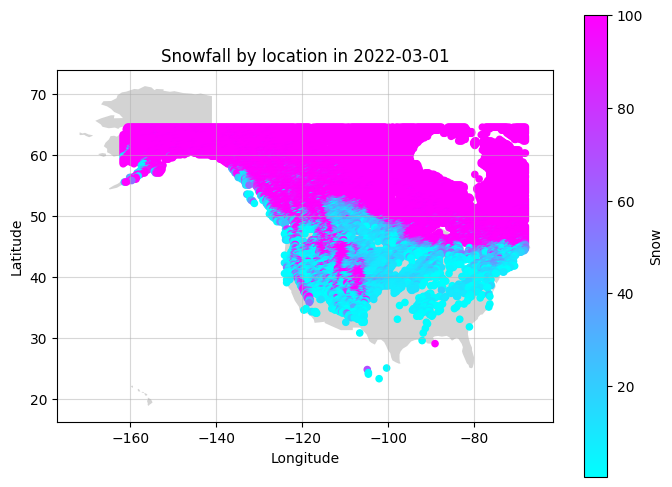

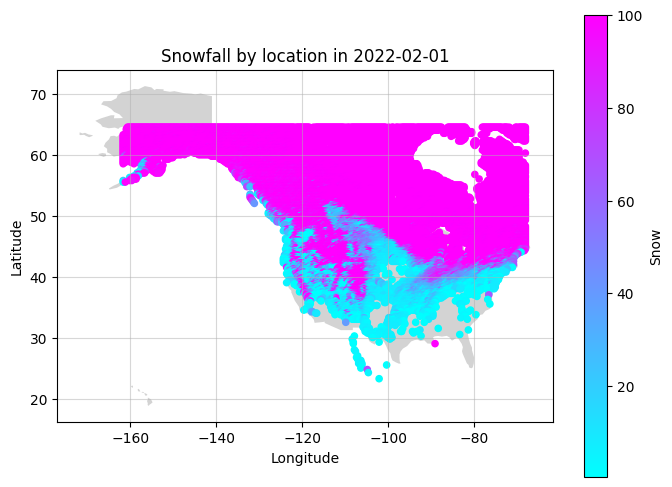

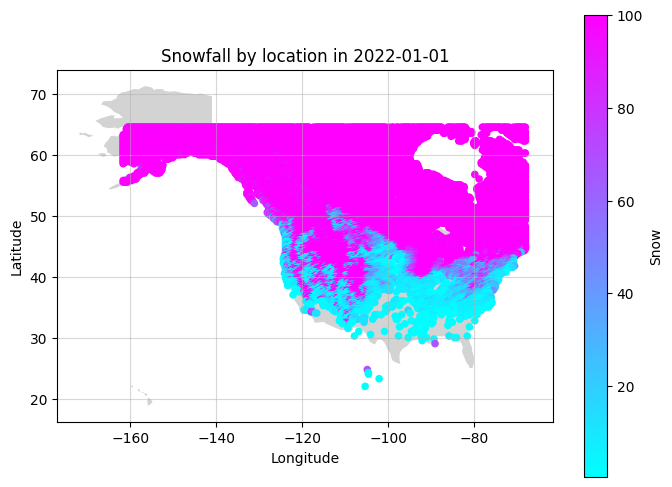

In [ ]:
for month in unique_months:
  fig, ax = plt.subplots(figsize=(8,6))
  countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
  us_snow_data[us_snow_data["Month"] == month].plot(x="Longitude", y="Latitude", kind="scatter", c="Snow", colormap="cool", ax=ax)

  ax.grid(alpha=0.5)
  plt.title("Snowfall by location in " + month)
  plt.show()

From the time evolution of snowfall over the duration of a year in 2022, it is shown that the heaviest snowfall occurs in the northernmost region of the country, as well as the mountain range along the wesr coast and the central area.

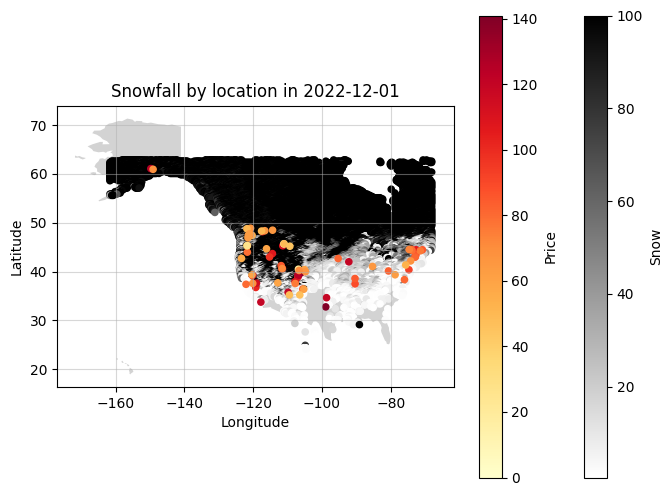

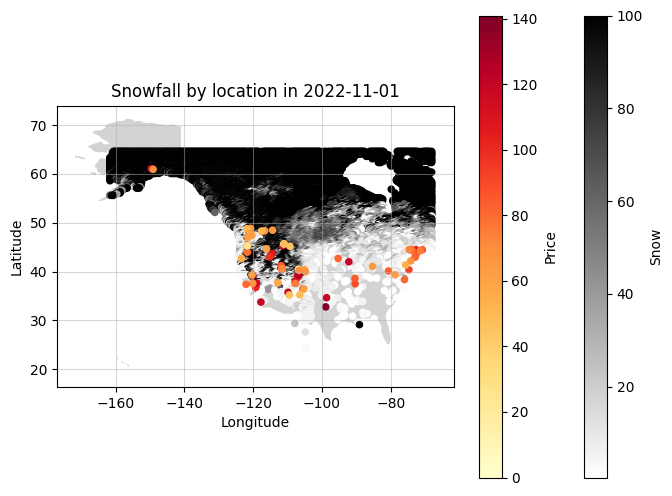

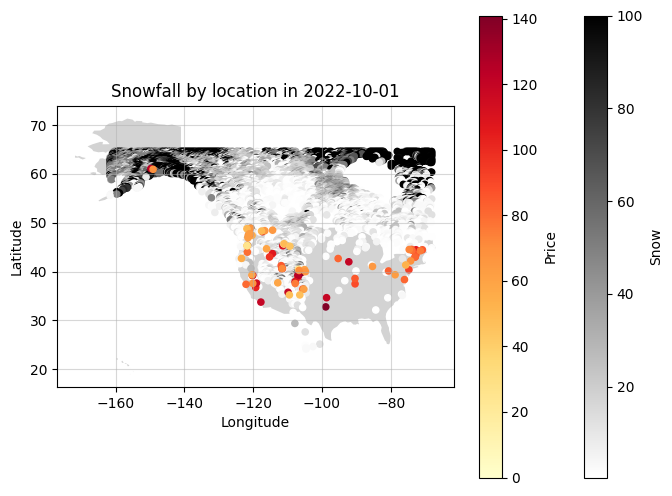

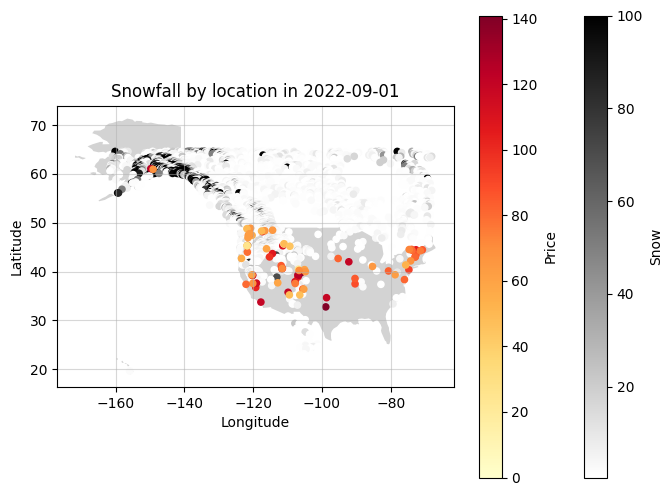

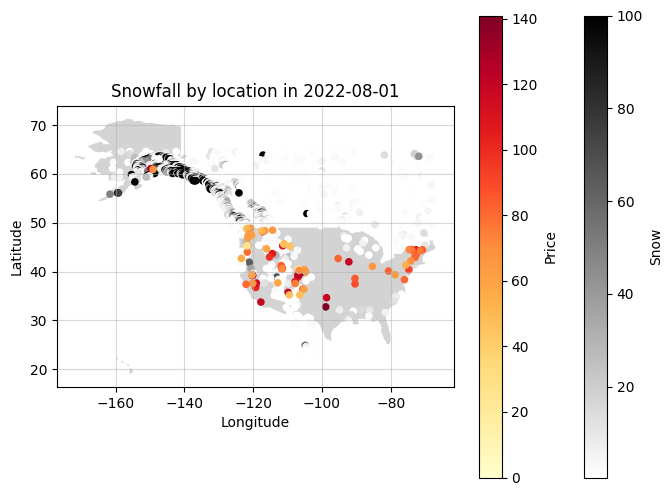

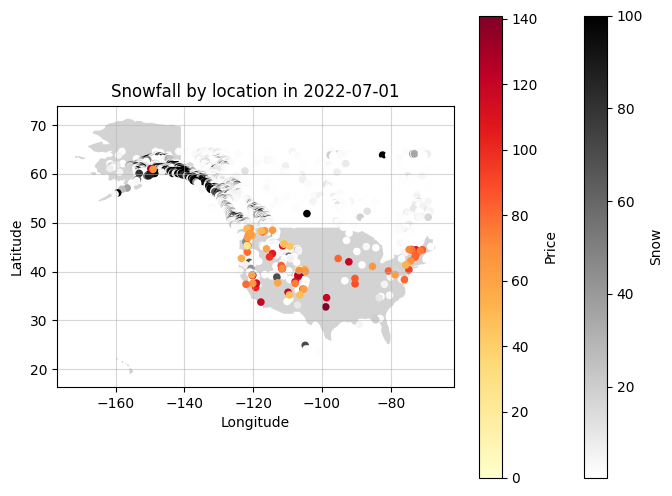

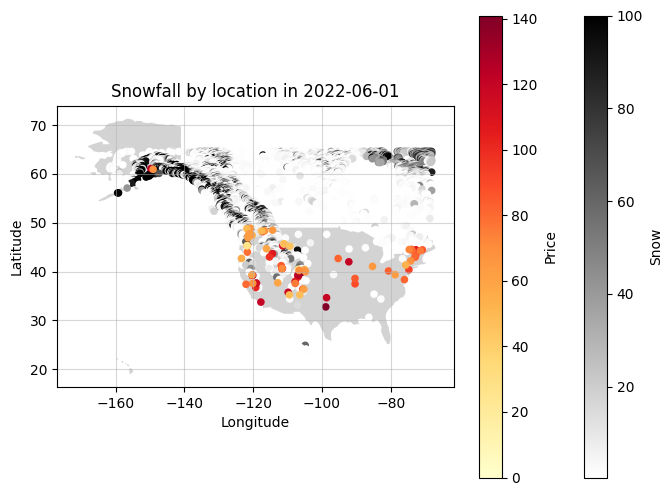

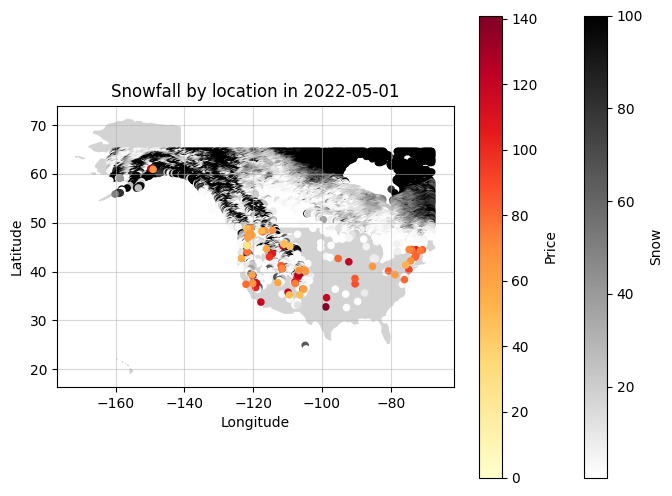

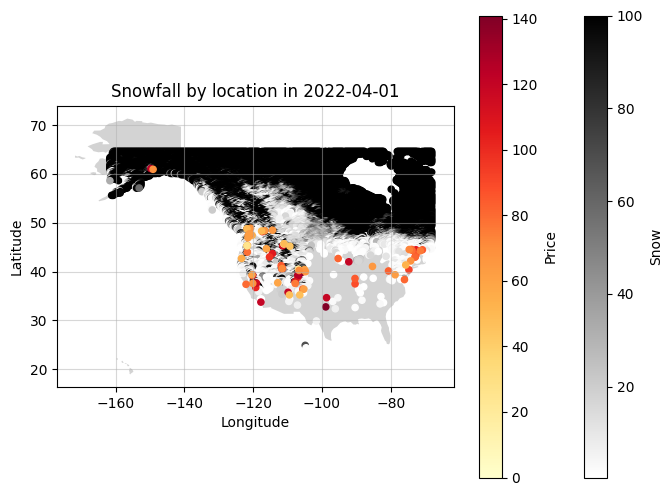

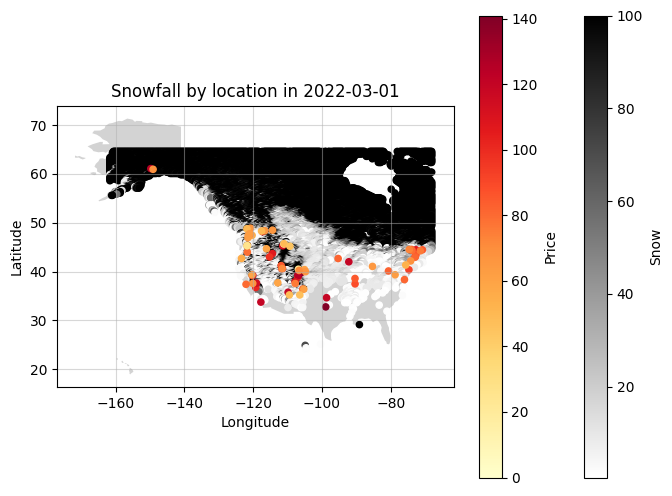

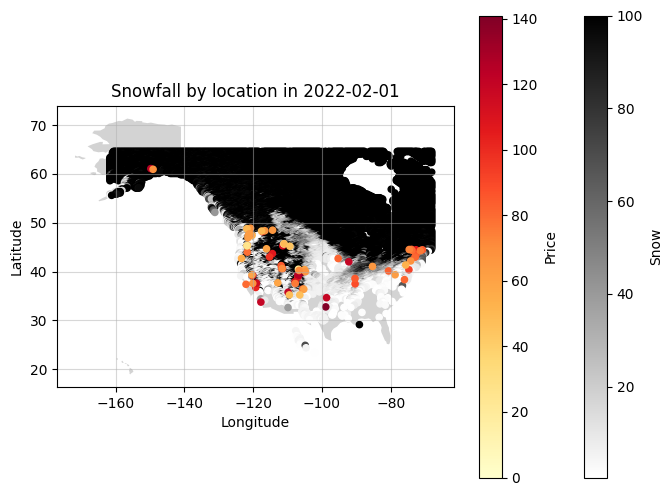

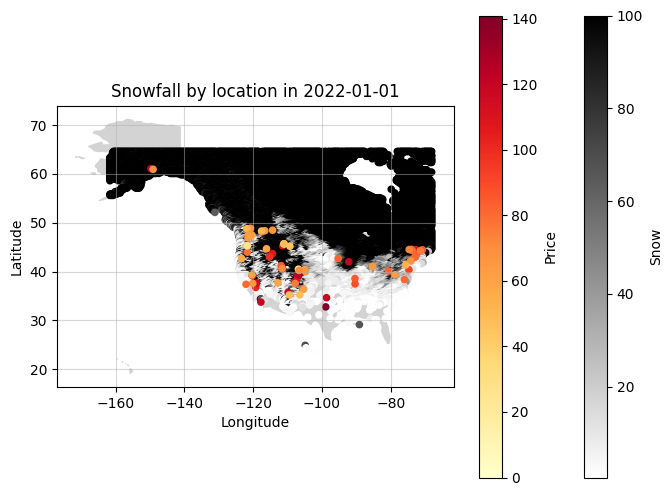

In [ ]:
for month in unique_months:
  fig, ax = plt.subplots(figsize=(8,6))
  countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
  us_snow_data[us_snow_data["Month"] == month].plot(x="Longitude", y="Latitude", kind="scatter", c="Snow", colormap="gist_yarg", ax=ax)
  us_resorts_data.plot(x="Longitude", y="Latitude", kind="scatter", c="Price", colormap="YlOrRd", ax=ax)

  ax.grid(alpha=0.5)
  plt.title("Snowfall by location in " + month)
  plt.show()

From this analysis, an interesting pattern is discovered. Some of the priciest ski resorts do not in fact receive great snowfall, whereas some of the cheaper resorts receive very susbtantial snowfall during the winter months. This knowledge will be helpful for a skiier who is looking for affordable ski resorts with a lot of snow, and helps to filter off options that are not of great worth and value (lacking snow while expensive).

To factor in the effects of climate change on snowfall, snowfall prediction will be performed using the latest climate data collected from the us government website.

In [ ]:
hist_weather_data = pd.read_csv('weather_data_124b.csv', encoding="ISO-8859-1")
print(hist_weather_data.describe())

                 WY          Year         Month           Day          Hour  \
count  96432.000000  96432.000000  96432.000000  96432.000000  96432.000000   
mean    2008.999253   2008.747387      6.522648     15.730463     11.500000   
std        3.162491      3.192084      3.448798      8.800486      6.922222   
min     2004.000000   2003.000000      1.000000      1.000000      0.000000   
25%     2006.000000   2006.000000      4.000000      8.000000      5.750000   
50%     2009.000000   2009.000000      7.000000     16.000000     11.500000   
75%     2012.000000   2011.000000     10.000000     23.000000     17.250000   
max     2014.000000   2014.000000     12.000000     31.000000     23.000000   

        Minute           T_a            RH           e_a           T_d  \
count  96432.0  96432.000000  96432.000000  96432.000000  96432.000000   
mean       0.0      6.948811      0.581859    551.969502     -2.117435   
std        0.0      9.616141      0.246874    237.938186      5.64

In [ ]:
hist_snow_data = pd.read_csv('rc.tg_.dc_.jd_sc.csv', encoding="ISO-8859-1")
print(hist_snow_data.describe())

                 WY          Year         Month           Day          Hour  \
count  96432.000000  96432.000000  96432.000000  96432.000000  96432.000000   
mean    2008.999253   2008.747387      6.522648     15.730463     11.500000   
std        3.162491      3.192084      3.448798      8.800486      6.922222   
min     2004.000000   2003.000000      1.000000      1.000000      0.000000   
25%     2006.000000   2006.000000      4.000000      8.000000      5.750000   
50%     2009.000000   2009.000000      7.000000     16.000000     11.500000   
75%     2012.000000   2011.000000     10.000000     23.000000     17.250000   
max     2014.000000   2014.000000     12.000000     31.000000     23.000000   

        Minute       z_s_124      z_s_124b       z_s_125      z_s_jdt1  \
count  96432.0  96432.000000  96432.000000  96432.000000  96432.000000   
mean       0.0   -468.490664  -2827.233696      0.686496  -2081.689345   
std        0.0   2118.896379   4510.178736    144.182952   4067.02

The historical snow and weather data will be cleaned and combined into one dataset for ease of model training.

In [ ]:
hist_weather_data = hist_weather_data[["T_a", "RH", "w_s", "w_d"]]
print(hist_weather_data)
print(hist_weather_data.describe())

        T_a    RH  w_s    w_d
0      17.2  0.28  0.7  255.5
1      16.3  0.30  0.9  240.7
2      15.6  0.33  0.7  142.0
3      14.2  0.36  0.6    6.5
4      14.2  0.38  0.6  332.6
...     ...   ...  ...    ...
96427   6.1  0.67  0.9  311.0
96428   3.6  0.78  0.5  130.0
96429   2.3  0.83  0.6  328.0
96430   2.2  0.87  0.5  218.0
96431   2.6  0.84  0.7  308.0

[96432 rows x 4 columns]
                T_a            RH           w_s           w_d
count  96432.000000  96432.000000  96432.000000  96432.000000
mean       6.948811      0.581859      1.849628    216.957824
std        9.616141      0.246874      1.138345     90.218461
min      -19.600000      0.050000      0.400000      0.000000
25%       -0.300000      0.370000      1.000000    169.000000
50%        5.700000      0.570000      1.600000    225.000000
75%       14.000000      0.800000      2.400000    292.000000
max       33.800000      1.000000     16.300000    360.000000


In [ ]:
hist_snow_data = hist_snow_data["z_s_124b"]
print(hist_snow_data)
print(hist_snow_data.describe())

0       -9999.0
1       -9999.0
2       -9999.0
3       -9999.0
4       -9999.0
          ...  
96427       0.0
96428       0.0
96429       0.0
96430       0.0
96431       0.0
Name: z_s_124b, Length: 96432, dtype: float64
count    96432.000000
mean     -2827.233696
std       4510.178736
min      -9999.000000
25%      -9999.000000
50%          0.000000
75%          0.000000
max         76.700000
Name: z_s_124b, dtype: float64


In [ ]:
hist_combined_data =  pd.concat([hist_weather_data, hist_snow_data], axis=1)
print(hist_combined_data.head())
hist_combined_data.drop(hist_combined_data[hist_combined_data["z_s_124b"] == -9999.0].index, inplace = True)
hist_combined_data.drop(hist_combined_data[hist_combined_data["z_s_124b"] == 0].index, inplace = True)
hist_combined_data = hist_combined_data.dropna()
print(hist_combined_data.describe())

    T_a    RH  w_s    w_d  z_s_124b
0  17.2  0.28  0.7  255.5   -9999.0
1  16.3  0.30  0.9  240.7   -9999.0
2  15.6  0.33  0.7  142.0   -9999.0
3  14.2  0.36  0.6    6.5   -9999.0
4  14.2  0.38  0.6  332.6   -9999.0
                T_a            RH           w_s           w_d      z_s_124b
count  23580.000000  23580.000000  23580.000000  23580.000000  23580.000000
mean      -1.718265      0.716069      2.128499    239.165098     26.584868
std        5.204777      0.205350      1.389519     67.594161     16.805614
min      -19.600000      0.120000      0.400000      0.000000      0.020000
25%       -5.100000      0.570000      1.100000    191.000000     11.350000
50%       -1.500000      0.740000      1.700000    241.000000     27.950000
75%        1.900000      0.900000      2.600000    300.000000     37.800000
max       17.800000      1.000000     16.300000    357.000000     76.700000


Features to be used will be temperature, relative humidity, wind speed and wind direction to be consistent with live readings from the US govenrment website.

Split into training and testing data subsets

In [ ]:
from sklearn.model_selection import train_test_split


#Split the dataset into the target variable relativeHumidity and all other features, y is the target, X represents all remaining features
X_train,X_test,y_train,y_test=train_test_split(hist_combined_data.drop(["z_s_124b"], axis=1), hist_combined_data["z_s_124b"], test_size=0.15, random_state=15)
X_val = X_train[-5000:]
y_val = y_train[-5000:]
X_train = X_train[:-5000]
y_train = y_train[:-5000]
print(X_train)
print(y_train)

       T_a    RH  w_s    w_d
56366  4.0  0.66  2.5  110.0
54463 -0.5  0.87  1.2  303.0
47478 -2.5  0.77  1.2  347.0
45791 -7.1  0.97  2.4  189.0
36792 -9.7  0.64  0.9  309.0
...    ...   ...  ...    ...
80907 -4.4  0.82  5.2  196.0
47607 -4.3  0.81  1.8  313.0
89482  4.7  0.29  1.4  185.0
29610  3.5  0.97  3.3  233.0
56998 -6.0  0.77  1.2  266.0

[15043 rows x 4 columns]
56366    63.25
54463    25.70
47478    30.80
45791    34.15
36792    14.00
         ...  
80907    23.20
47607    37.70
89482     7.72
29610     4.00
56998    44.75
Name: z_s_124b, Length: 15043, dtype: float64


Train a dense neural network to predict snowfall depth based on the weather features

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
#No scaling is needed for the input data as it is single feature, scaling should be performed for multi-feature inputs

input = Input(shape=(4,))
l1 = Dense(4, activation="relu")(input)
l2 = Dense(64, activation="relu")(l1)
l3 = Dense(256, activation="relu")(l2)
l4 = Dense(256, activation="relu")(l3)
l5 = Dense(256, activation="relu")(l4)
l6 = Dense(64, activation="relu")(l5)
l7 = Dense(32, activation="relu")(l6)
out = Dense(1, activation="linear")(l7)

model = Model(inputs=input, outputs=out)

model.compile(
    optimizer='adam',
    loss=['mean_squared_error']
    )

history = model.fit(X_train.astype('float32'), y_train.astype('float32'), batch_size=64, epochs=60, validation_data=(X_val, y_val))

Epoch 1/60
236/236 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 369.9159 - val_loss: 363.7853
Epoch 2/60
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 342.2735 - val_loss: 324.7566
Epoch 3/60
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 313.6371 - val_loss: 295.7268
Epoch 4/60
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 303.3935 - val_loss: 279.0601
Epoch 5/60
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 290.3670 - val_loss: 296.1322
Epoch 6/60
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 279.9193 - val_loss: 308.6595
Epoch 7/60
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 299.4099 - val_loss: 271.8846
Epoch 8/60
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 279.7159 - val_loss: 269.6564
Epoch 9/60
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 276.7926 - val_loss: 276.4257
Epoch 10/60
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 284.4119 - val_loss: 269.8126
Epoch 11/60
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 273.5371 - val_loss: 277.7048
Epoc

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 268.2404
test loss, test acc: 269.74224853515625


In [ ]:
snow_pred = model.predict(X_test)
snow_actual = y_test
print(snow_pred)
print(snow_actual)

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[31.250889]
 [27.623676]
 [24.365675]
 ...
 [22.332037]
 [17.409597]
 [26.298693]]
82616    29.23
38253    59.00
72996    25.50
73797    49.42
65048    30.68
         ...  
46954    33.60
37139    38.00
81752    26.25
90268    11.80
79953     1.70
Name: z_s_124b, Length: 3537, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
snow_pred = rf.predict(X_test)
snow_actual = y_test
print(snow_pred)
print(snow_actual)

print("MAPE is", round(mean_absolute_percentage_error(snow_actual,snow_pred) * 100, 2), "%")

[26.2012 36.1712 20.5578 ... 21.7116 22.115  21.8655]
82616    29.23
38253    59.00
72996    25.50
73797    49.42
65048    30.68
         ...  
46954    33.60
37139    38.00
81752    26.25
90268    11.80
79953     1.70
Name: z_s_124b, Length: 3537, dtype: float64
MAPE is 232.71 %


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X=X_train, y=y_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# y_train_scaled = scaler.transform(y_train)
# y_test_scaled = scaler.transform(y_test)

In [ ]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate (shrinkage)
    'max_depth': [3, 6, 9],  # Depth of each tree
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) in a child
    'subsample': [0.7, 0.8, 0.9],  # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 0.9],  # Subsample ratio of features
    'alpha': [0, 0.1, 0.5],  # L1 regularization term
    'lambda': [0, 1, 5]  # L2 regularization term
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train the best model found by GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plotting actual vs predicted snow depth
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line (y=x)
plt.xlabel('Actual Snow Depth')
plt.ylabel('Predicted Snow Depth')
plt.title('Actual vs Predicted Snow Depth')
plt.show()

# Feature importance (important to understand which features affect predictions most)
feature_importance = best_xgb_model.feature_importances_
features = X_train.columns

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Snow Depth')
plt.show()

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits


KeyboardInterrupt: 

Fetch latest weather data from the US government website.

In [ ]:
import requests

#Declare identifiers for weather points
IN_WEATHER = "0728W"
HI_WEATHER = "043HI"
TX_WEATHER = "025HC"
KY_WEATHER = "0678W"
MT_WEATHER = "07MT"
MI_WEATHER = "0499W"
CA_WEATHER = "011PG"
FL_WEATHER = "0239W"
MA_WEATHER = "0258W"


in_weather_json = requests.get("https://api.weather.gov/stations/" + IN_WEATHER +"/observations?limit=1").json()
in_weather_df = pd.json_normalize(in_weather_json, record_path="features")

#Drop redundant columns
cols_to_drop = [col for col in in_weather_df.columns if not "properties" in col or not "value" in col]
in_weather_df_cleaned = in_weather_df.drop(cols_to_drop, axis=1)
#Rename columns to display weather attribute clearly
in_weather_df_cleaned.columns = [col.replace("properties.","").replace(".value", "") for col in in_weather_df_cleaned.columns]

input = in_weather_df_cleaned[["temperature", "relativeHumidity", "windSpeed", "windDirection"]]
input.rename(columns={'temperature': 'T_a', 'relativeHumidity': 'RH','windSpeed': 'w_s', 'windDirection': 'w_d'}, inplace=True)
y_pred = best_xgb_model.predict(input)
print(y_pred)

Exploring the relationship between visitor numbers and the characteristics of the ski resorts.

In [ ]:
print(us_resorts_data[["Resort", "Latitude", "Longitude"]])

                              Resort   Latitude   Longitude
21                         Steamboat  35.754022 -109.853751
22   Howelsen Hill-Steamboat Springs  40.480533 -106.840605
24                     Crested Butte  38.869820 -106.984043
25                      Jackson Hole  34.641109  -98.676192
26                         Park City  40.646092 -111.497996
..                               ...        ...         ...
447          Montage Mountain Resort  41.349713  -75.662134
456                      Sandia Peak  35.210045 -106.449650
470             Crystal Mountain-WA-  46.928167 -121.504535
480                     Stevens Pass  47.745635 -121.089171
490                    Loon Mountain  44.516452  -74.649625

[78 rows x 3 columns]


Add rating data to the dataset

In [ ]:
resorts_data_2 = pd.read_csv('ski-resorts.csv', encoding="ISO-8859-1")

In [ ]:
us_resorts_data_2 = resorts_data_2[resorts_data_2['location_country'] == "USA"]
print(us_resorts_data_2.shape)

(482, 14)


In [ ]:
trimmed_us_resorts_data_2 = us_resorts_data_2[["name", "rating"]]
print(trimmed_us_resorts_data_2)

                                     name  rating
10                        Palisades Tahoe  1147.8
17                              Park City  1133.9
20                           Jackson Hole  1127.2
28                         Big Sky Resort  1117.4
36                               Snowmass  1107.9
...                                   ...     ...
3212                    Eagle Island Park   814.3
3237                            Cloudmont   811.8
3248    WinterClub Indoor Ski & Snowboard   809.2
3266  Inside Ski Training Center Leesburg   807.3
3282                        Las Vegas Wet   801.3

[482 rows x 2 columns]


In [ ]:
merged_us_resorts_data = pd.merge(us_resorts_data, trimmed_us_resorts_data_2, left_on='Resort', right_on='name')
merged_us_resorts_data.drop('name', axis=1, inplace=True)
print(merged_us_resorts_data)

     ID           Resort   Latitude   Longitude        Country      Continent  \
0    22        Steamboat  35.754022 -109.853751  United States  North America   
1    25    Crested Butte  38.869820 -106.984043  United States  North America   
2    26     Jackson Hole  34.641109  -98.676192  United States  North America   
3    27        Park City  40.646092 -111.497996  United States  North America   
4    29   Arapahoe Basin  40.121121  -80.669843  United States  North America   
..  ...              ...        ...         ...            ...            ...   
56  425  Tamarack Resort  44.670006 -116.122502  United States  North America   
57  435    Bolton Valley  39.345511  -78.757192  United States  North America   
58  457      Sandia Peak  35.210045 -106.449650  United States  North America   
59  481     Stevens Pass  47.745635 -121.089171  United States  North America   
60  491    Loon Mountain  44.516452  -74.649625  United States  North America   

    Price            Season

Explore relationship of actual resort ranking with the various characteristics of ski resorts

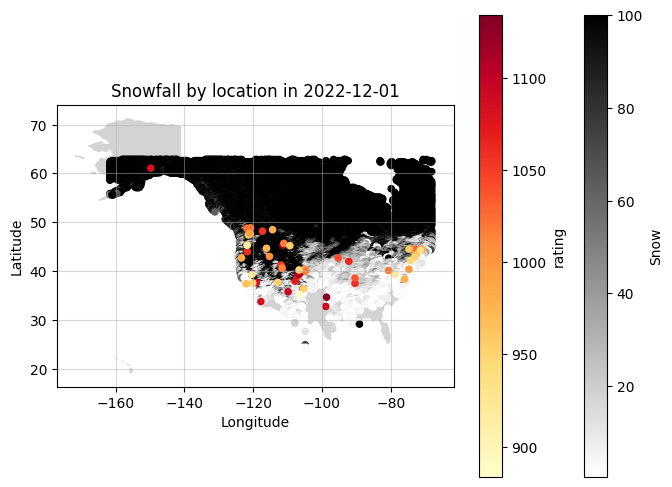

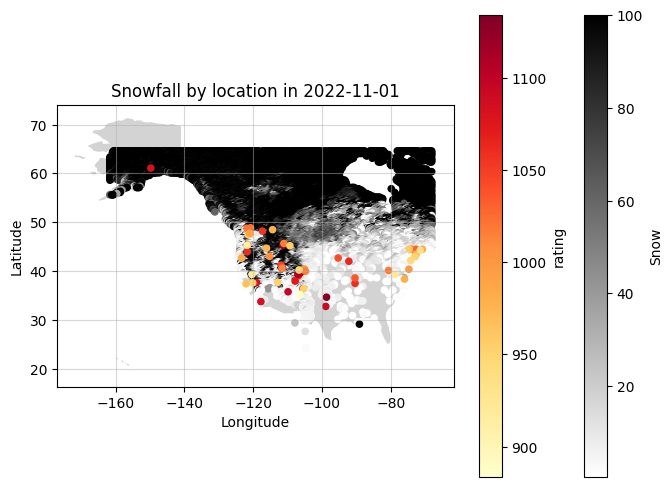

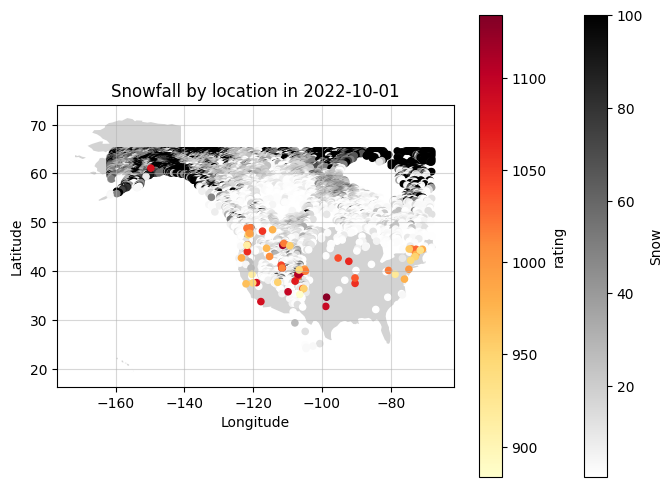

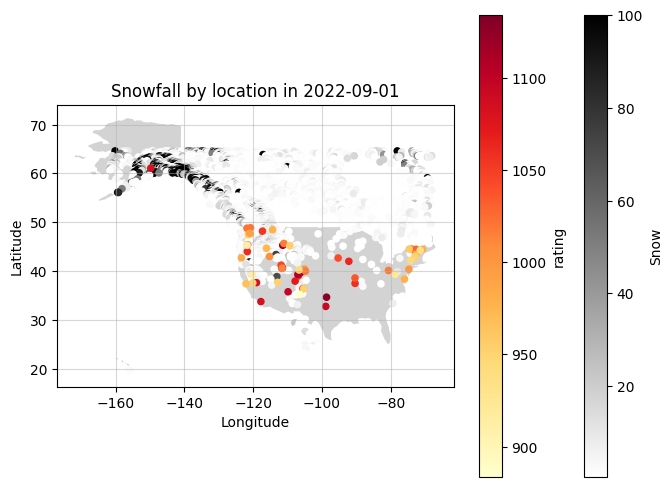

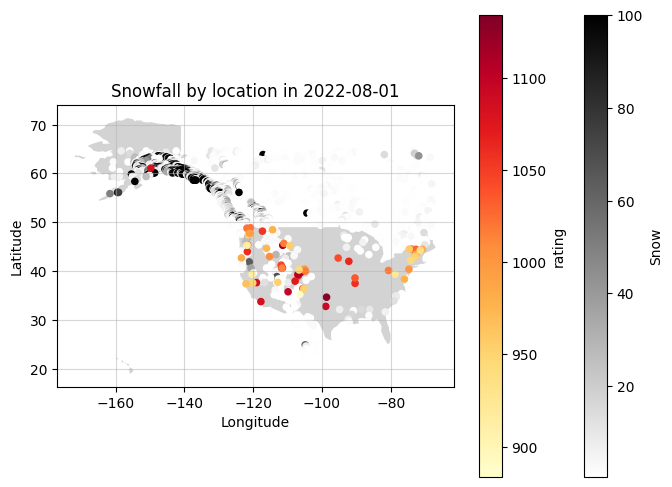

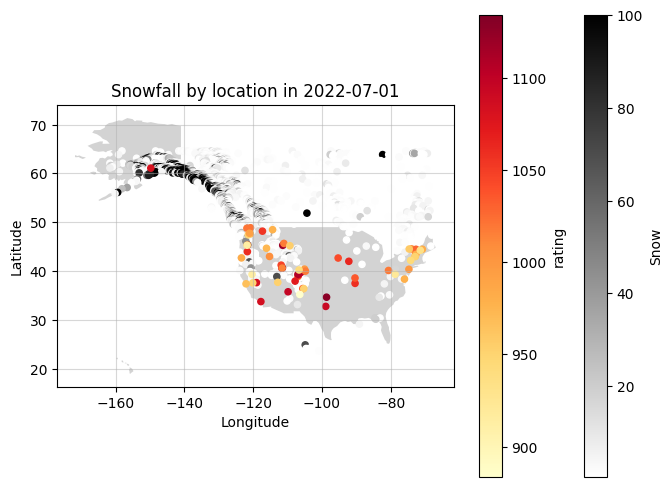

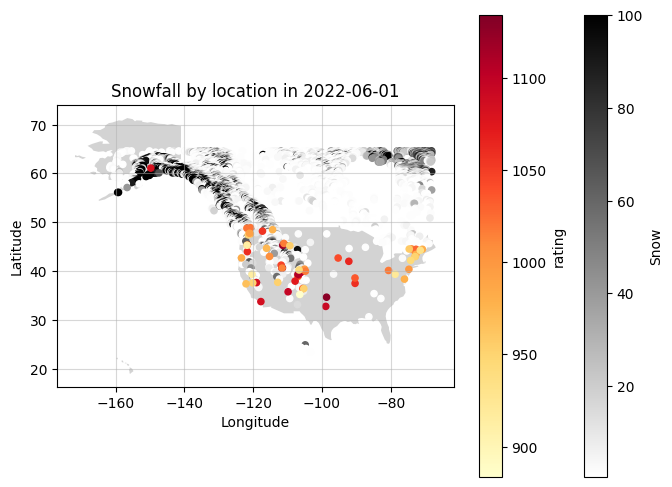

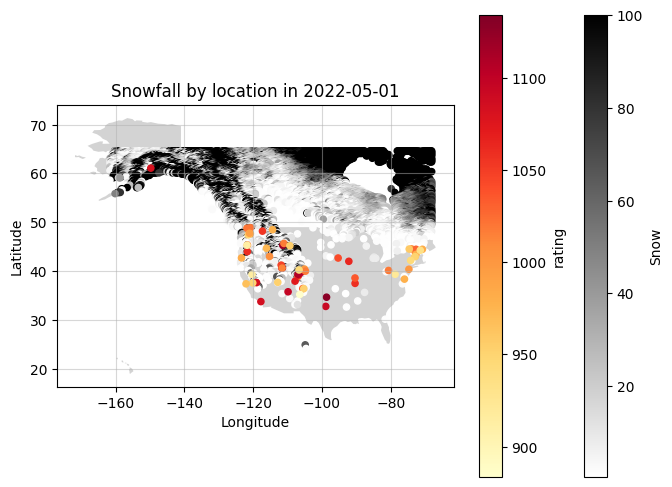

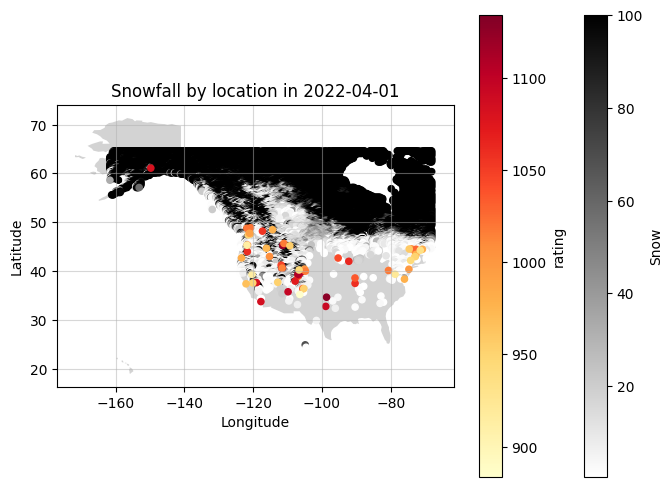

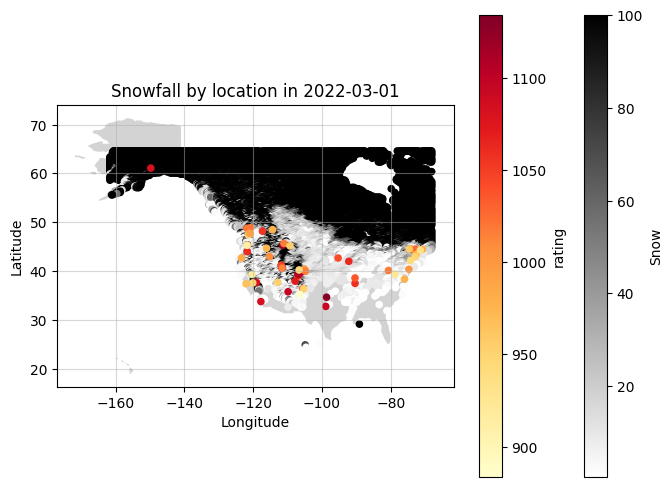

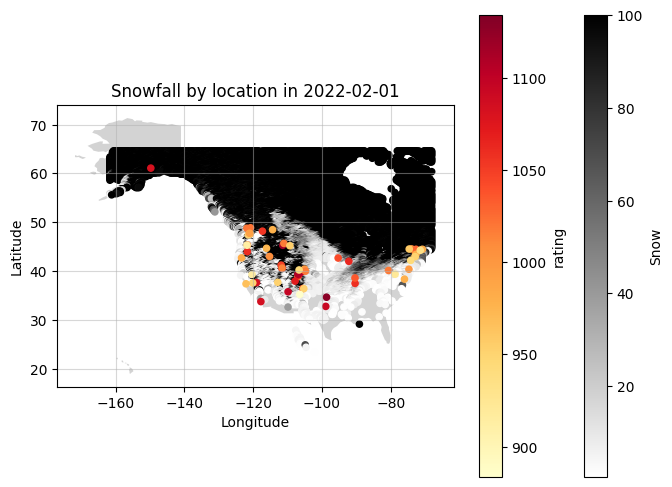

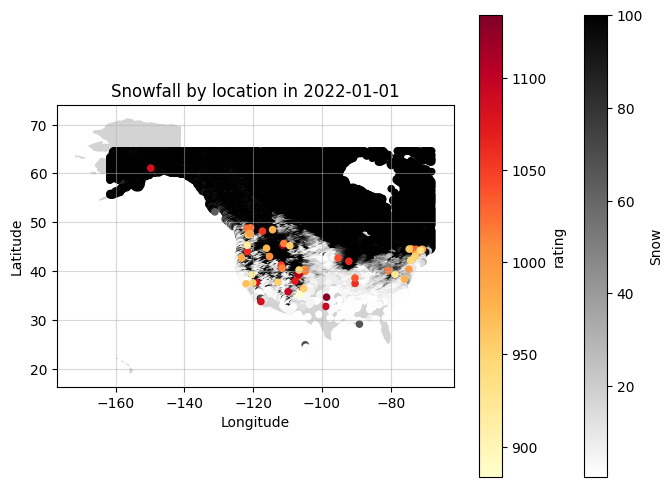

In [ ]:
for month in unique_months:
  fig, ax = plt.subplots(figsize=(8,6))
  countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
  us_snow_data[us_snow_data["Month"] == month].plot(x="Longitude", y="Latitude", kind="scatter", c="Snow", colormap="gist_yarg", ax=ax)
  merged_us_resorts_data.plot(x="Longitude", y="Latitude", kind="scatter", c="rating", colormap="YlOrRd", ax=ax)

  ax.grid(alpha=0.5)
  plt.title("Snowfall by location in " + month)
  plt.show()

Text(0.5, 1.0, 'Rating against price')

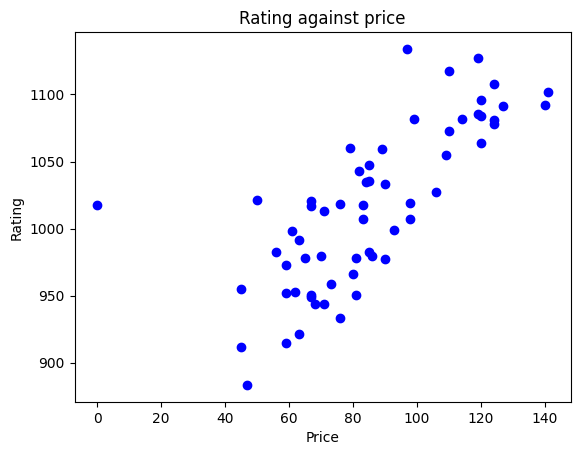

In [ ]:
plt.scatter(merged_us_resorts_data["Price"], merged_us_resorts_data["rating"], c ="blue")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Rating against price")

Correlation coefficient (r): A value between -1 and 1, indicating the strength and direction of the linear relationship between the two variables.
P-value: A measure of the statistical significance of the correlation. A small p-value (typically less than 0.05) indicates that the correlation is likely not due to random chance.

In [ ]:
import scipy.stats as stats

correlation_coefficient, p_value = stats.pearsonr(merged_us_resorts_data["Price"], merged_us_resorts_data["rating"])

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation coefficient: 0.7467709169851027
P-value: 4.848612474398068e-12


Text(0.5, 1.0, 'Rating against highest point')

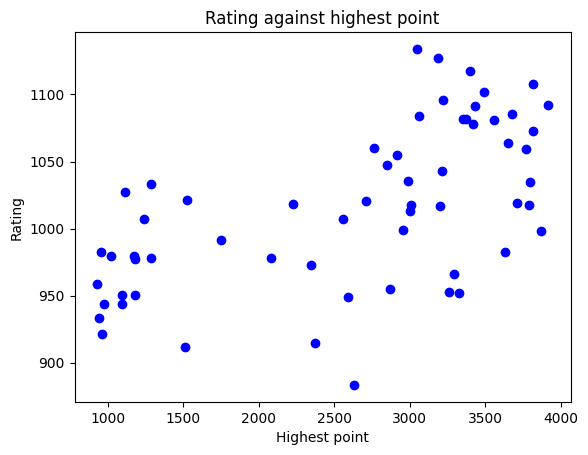

In [ ]:
plt.scatter(merged_us_resorts_data["Highest point"], merged_us_resorts_data["rating"], c ="blue")
plt.xlabel("Highest point")
plt.ylabel("Rating")
plt.title("Rating against highest point")

In [ ]:
correlation_coefficient, p_value = stats.pearsonr(merged_us_resorts_data["Highest point"], merged_us_resorts_data["rating"])

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation coefficient: 0.596337729609852
P-value: 3.9519630682009596e-07


Text(0.5, 1.0, 'Rating against total lifts')

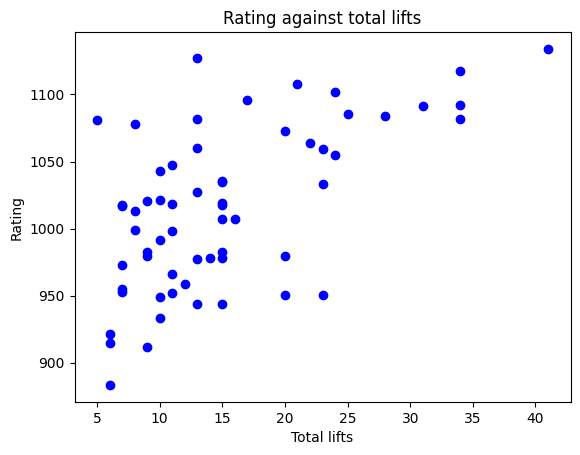

In [ ]:
plt.scatter(merged_us_resorts_data["Total lifts"], merged_us_resorts_data["rating"], c ="blue")
plt.xlabel("Total lifts")
plt.ylabel("Rating")
plt.title("Rating against total lifts")

In [ ]:
correlation_coefficient, p_value = stats.pearsonr(merged_us_resorts_data["Total lifts"], merged_us_resorts_data["rating"])

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation coefficient: 0.6022780615424803
P-value: 2.8216454096385715e-07


Text(0.5, 1.0, 'Rating against lift capacity')

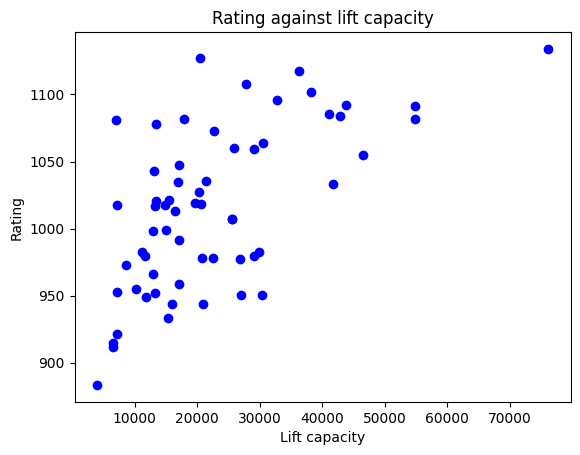

In [ ]:
plt.scatter(merged_us_resorts_data["Lift capacity"], merged_us_resorts_data["rating"], c ="blue")
plt.xlabel("Lift capacity")
plt.ylabel("Rating")
plt.title("Rating against lift capacity")

In [ ]:
correlation_coefficient, p_value = stats.pearsonr(merged_us_resorts_data["Lift capacity"], merged_us_resorts_data["rating"])

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation coefficient: 0.6171355353104192
P-value: 1.178234676438344e-07


Analyse how the clusters from the k means clustering are classified (for 4 clusters)

In [ ]:
cluster_0 = merged_us_resorts_data[merged_us_resorts_data['Cluster'] == 0]
print(cluster_0)

     ID                     Resort   Latitude   Longitude        Country  \
0    22                  Steamboat  35.754022 -109.853751  United States   
11   94               Beaver Creek  39.604879 -106.515002  United States   
13  154             Big Sky Resort  45.283978 -111.401115  United States   
14  155                   Snowmass  39.331651 -106.986156  United States   
16  166                   Keystone  41.998889  -92.197935  United States   
18  169            Copper Mountain  37.478109  -90.385673  United States   
26  199               Mt. Bachelor  43.979282 -121.688365  United States   
29  207                   Stratton  43.042856  -72.910933  United States   
30  211  Whitefish Mountain Resort  48.481083 -114.357850  United States   
32  216                 Sugar Bowl  42.993233 -115.242014  United States   
34  218                  Telluride  37.937494 -107.812285  United States   
35  221                  Sugarbush  44.541714  -73.969869  United States   
36  227     

In [ ]:
cluster_1 = merged_us_resorts_data[merged_us_resorts_data['Cluster'] == 1]
print(cluster_1)

     ID              Resort   Latitude   Longitude        Country  \
4    29      Arapahoe Basin  40.121121  -80.669843  United States   
8    89     Aspen Highlands  61.103269 -149.740657  United States   
25  197          Wolf Creek  42.695516 -123.395299  United States   
38  242            Jay Peak  47.631371 -120.829534  United States   
39  245          Angel Fire  36.393088 -105.285009  United States   
43  263         Bear Valley  37.568824 -120.119349  United States   
45  271    Mt. Hood Skibowl  45.301819 -121.773786  United States   
47  273  Red Lodge Mountain  45.190753 -109.336873  United States   
54  321    Donner Ski Ranch  39.318880 -120.331067  United States   
56  425     Tamarack Resort  44.670006 -116.122502  United States   
57  435       Bolton Valley  39.345511  -78.757192  United States   
58  457         Sandia Peak  35.210045 -106.449650  United States   

        Continent  Price            Season  Highest point  Lowest point  ...  \
4   North America     

In [ ]:
cluster_2 = merged_us_resorts_data[merged_us_resorts_data['Cluster'] == 2]
print(cluster_2)

     ID              Resort   Latitude   Longitude        Country  \
3    27           Park City  40.646092 -111.497996  United States   
5    79  Winter Park Resort  39.871614 -105.782709  United States   
9    91                Vail  39.644021 -106.380167  United States   
12   98        Breckenridge  32.755839  -98.903255  United States   
17  168          Killington  43.674330  -72.778445  United States   
24  195         Deer Valley  48.181568 -117.300773  United States   
27  203            Heavenly  33.741419 -117.755580  United States   
33  217    Mammoth Mountain  37.630769 -119.032634  United States   

        Continent  Price            Season  Highest point  Lowest point  ...  \
3   North America     97  November - April           3049          2080  ...   
5   North America    119  November - April           3676          2743  ...   
9   North America    127  November - April           3433          2457  ...   
12  North America    140  November - April           3914 

In [ ]:
cluster_3 = merged_us_resorts_data[merged_us_resorts_data['Cluster'] == 3]
print(cluster_3)

     ID            Resort   Latitude   Longitude        Country  \
1    25     Crested Butte  38.869820 -106.984043  United States   
2    26      Jackson Hole  34.641109  -98.676192  United States   
6    87              Alta  42.673689  -95.303994  United States   
7    88    Aspen Mountain  39.176099 -106.829206  United States   
10   93         Snowbasin  41.216317 -111.857428  United States   
15  165   Powder Mountain  48.877358 -120.767615  United States   
19  177         Sugarloaf  38.348177  -76.033548  United States   
20  179              Taos  36.407238 -105.573284  United States   
21  185          Snowbird  40.580755 -111.657296  United States   
22  191          Mt. Rose  40.369273  -74.739050  United States   
23  193         Mt. Baker  48.776770 -121.814566  United States   
28  206          Loveland  40.397761 -105.074980  United States   
31  215  Mt. Hood Meadows  45.338708 -121.665528  United States   
37  235  Yellowstone Club  45.668198 -111.067446  United State

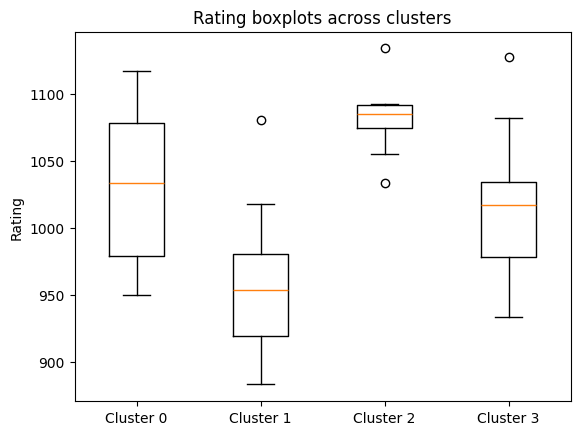

In [ ]:
fig, ax = plt.subplots()

ax.boxplot([cluster_0["rating"], cluster_1["rating"], cluster_2["rating"], cluster_3["rating"]])

ax.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
ax.set_ylabel('Rating')
ax.set_title('Rating boxplots across clusters')

plt.show()

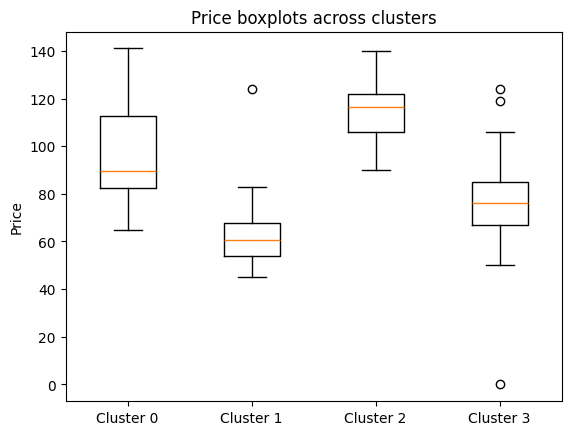

In [ ]:
fig, ax = plt.subplots()

ax.boxplot([cluster_0["Price"], cluster_1["Price"], cluster_2["Price"], cluster_3["Price"]])

ax.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
ax.set_ylabel('Price')
ax.set_title('Price boxplots across clusters')

plt.show()

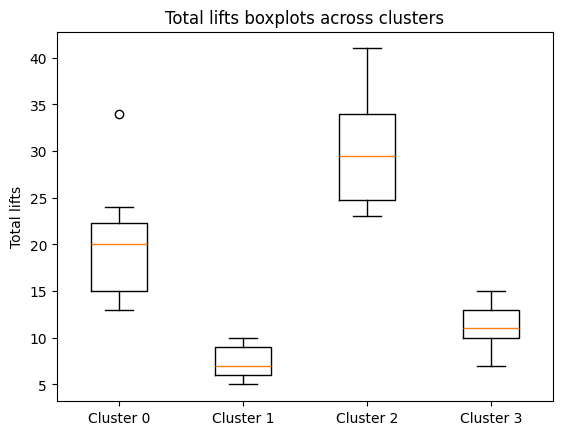

In [ ]:
fig, ax = plt.subplots()

ax.boxplot([cluster_0["Total lifts"], cluster_1["Total lifts"], cluster_2["Total lifts"], cluster_3["Total lifts"]])

ax.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
ax.set_ylabel('Total lifts')
ax.set_title('Total lifts boxplots across clusters')

plt.show()

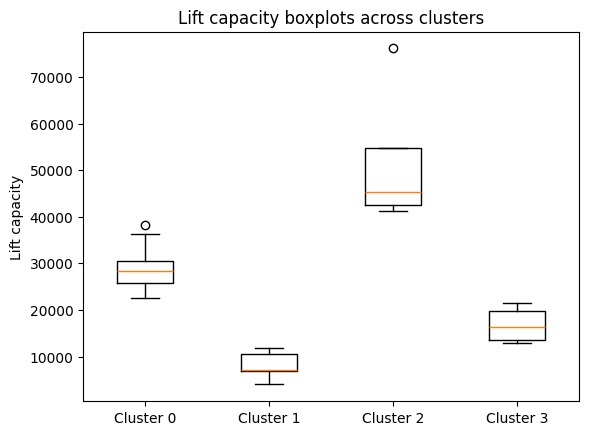

In [ ]:
fig, ax = plt.subplots()

ax.boxplot([cluster_0["Lift capacity"], cluster_1["Lift capacity"], cluster_2["Lift capacity"], cluster_3["Lift capacity"]])

ax.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
ax.set_ylabel('Lift capacity')
ax.set_title('Lift capacity boxplots across clusters')

plt.show()

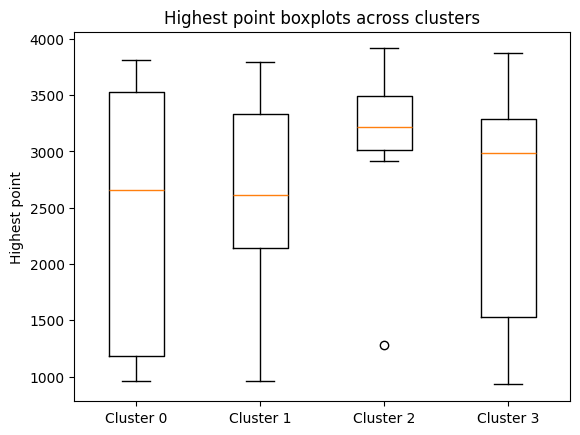

In [ ]:
fig, ax = plt.subplots()

ax.boxplot([cluster_0["Highest point"], cluster_1["Highest point"], cluster_2["Highest point"], cluster_3["Highest point"]])

ax.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
ax.set_ylabel('Highest point')
ax.set_title('Highest point boxplots across clusters')

plt.show()

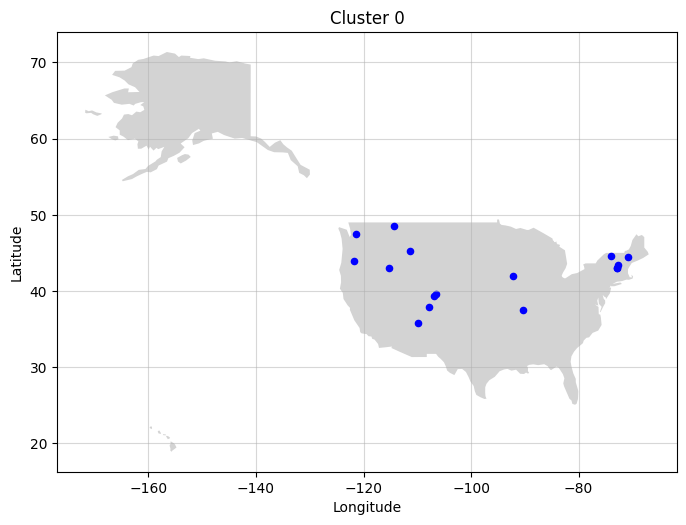

In [ ]:
  fig, ax = plt.subplots(figsize=(8,6))
  countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
  cluster_0.plot(x="Longitude", y="Latitude", kind="scatter", c="blue", ax=ax)

  ax.grid(alpha=0.5)
  plt.title("Cluster 0")
  plt.show()

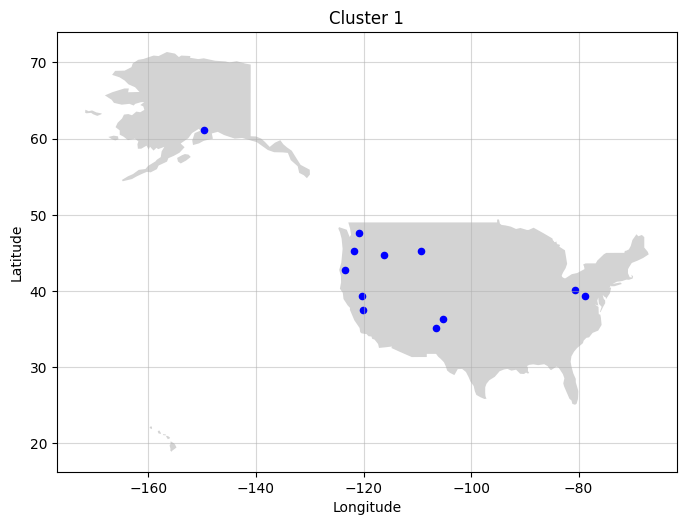

In [ ]:
  fig, ax = plt.subplots(figsize=(8,6))
  countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
  cluster_1.plot(x="Longitude", y="Latitude", kind="scatter", c="blue", ax=ax)

  ax.grid(alpha=0.5)
  plt.title("Cluster 1")
  plt.show()

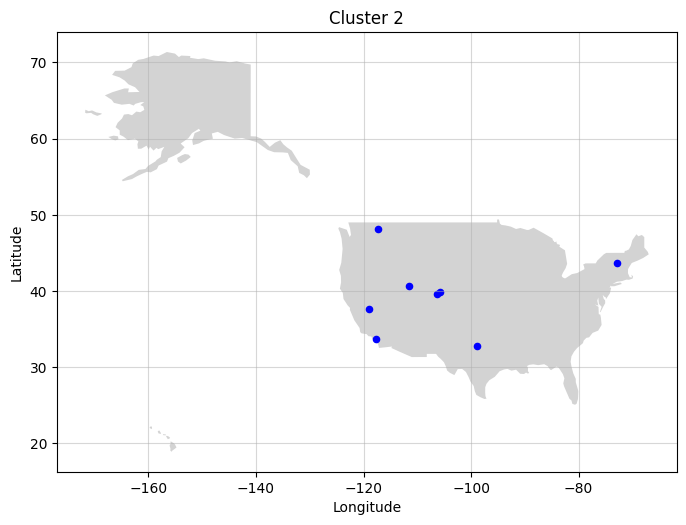

In [ ]:
  fig, ax = plt.subplots(figsize=(8,6))
  countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
  cluster_2.plot(x="Longitude", y="Latitude", kind="scatter", c="blue", ax=ax)

  ax.grid(alpha=0.5)
  plt.title("Cluster 2")
  plt.show()

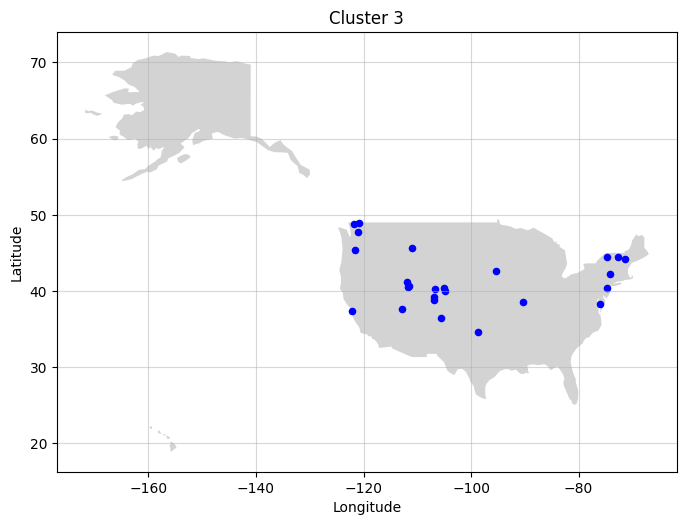

In [ ]:
  fig, ax = plt.subplots(figsize=(8,6))
  countries[countries["NAME"] == "United States of America"].plot(color="lightgrey",ax=ax)
  cluster_3.plot(x="Longitude", y="Latitude", kind="scatter", c="blue", ax=ax)

  ax.grid(alpha=0.5)
  plt.title("Cluster 3")
  plt.show()

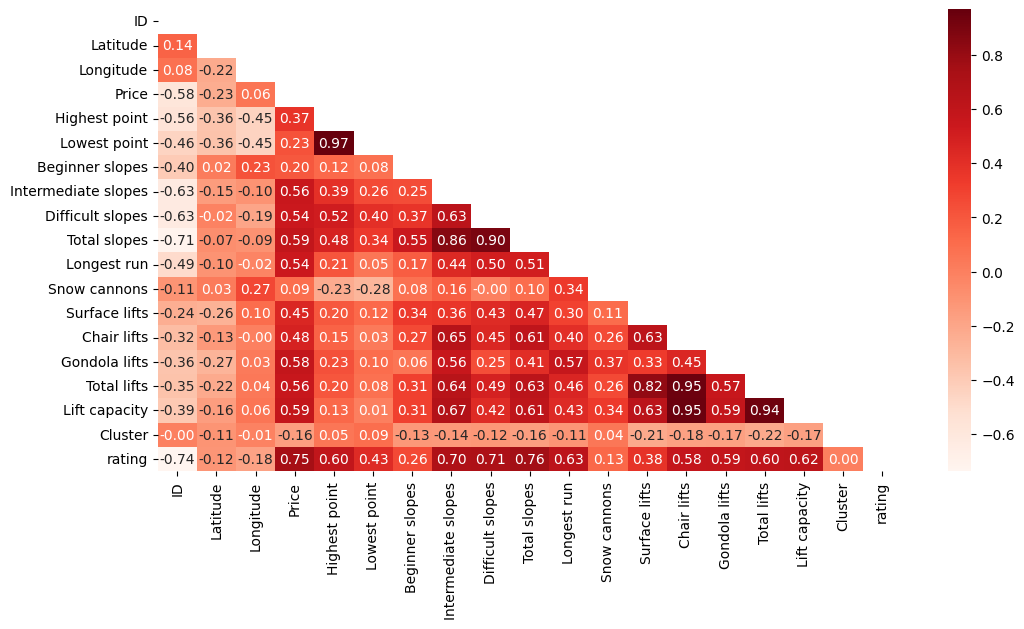

In [ ]:
#Using Pearson Correlation
corr = merged_us_resorts_data.corr(numeric_only=True)
tri_matrix = np.triu(np.ones_like(corr))
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, mask=tri_matrix, fmt='.2f',)
plt.show()

Rating most correlated with price, total slopes, intermediate, difficult slopes, BUT not beginner slopes surprisingly. Means most people leaving ratings are visitors of intermediate and above difficulty slopes.

In [ ]:
trimmed_us_resorts_data_2 = us_resorts_data_2[["name", "rating"]]
vail_row = trimmed_us_resorts_data_2.loc[trimmed_us_resorts_data_2['name'].str.contains('Vail')]
breck_row = trimmed_us_resorts_data_2.loc[trimmed_us_resorts_data_2['name'].str.contains('Breckenridge')]
mammoth_row = trimmed_us_resorts_data_2.loc[trimmed_us_resorts_data_2['name'].str.contains('Mammoth')]
keystone_row = trimmed_us_resorts_data_2.loc[trimmed_us_resorts_data_2['name'].str.contains('Keystone')]
steamboat_row = trimmed_us_resorts_data_2.loc[trimmed_us_resorts_data_2['name'].str.contains('Steamboat')]
beaver_row = trimmed_us_resorts_data_2.loc[trimmed_us_resorts_data_2['name'].str.contains('Beaver Creek')]
heavenly_row = trimmed_us_resorts_data_2.loc[trimmed_us_resorts_data_2['name'].str.contains('Heavenly')]
northstar_row = trimmed_us_resorts_data_2.loc[trimmed_us_resorts_data_2['name'].str.contains('Northstar')]
snowmass_row = trimmed_us_resorts_data_2.loc[trimmed_us_resorts_data_2['name'].str.contains('Snowmass')]
okemo_row = trimmed_us_resorts_data_2.loc[trimmed_us_resorts_data_2['name'].str.contains('Okemo')]

merged_results = pd.concat([vail_row, breck_row], axis=0)
merged_results = pd.concat([merged_results, mammoth_row], axis=0)
merged_results = pd.concat([merged_results, keystone_row], axis=0)
merged_results = pd.concat([merged_results, steamboat_row], axis=0)
merged_results = pd.concat([merged_results, beaver_row], axis=0)
merged_results = pd.concat([merged_results, heavenly_row], axis=0)
merged_results = pd.concat([merged_results, northstar_row], axis=0)
merged_results = pd.concat([merged_results, snowmass_row], axis=0)
merged_results = pd.concat([merged_results, okemo_row], axis=0)

print(merged_results)


                     name  rating
51                   Vail  1091.2
50           Breckenridge  1092.3
60       Mammoth Mountain  1081.4
84               Keystone  1063.6
43              Steamboat  1096.0
40           Beaver Creek  1101.9
56               Heavenly  1084.1
78   Northstar California  1067.9
36               Snowmass  1107.9
373                 Okemo   979.5


The ratings do not line up with the visitor numbers!

In [ ]:
visitorship = [1.63, 1.6, 1.13, 1.04, 0.92, 0.92, 0.89, 0.74, 0.73, 0.61]
merged_results["visitors_mil"] = visitorship
print(merged_results)

                     name  rating  visitors_mil
51                   Vail  1091.2          1.63
50           Breckenridge  1092.3          1.60
60       Mammoth Mountain  1081.4          1.13
84               Keystone  1063.6          1.04
43              Steamboat  1096.0          0.92
40           Beaver Creek  1101.9          0.92
56               Heavenly  1084.1          0.89
78   Northstar California  1067.9          0.74
36               Snowmass  1107.9          0.73
373                 Okemo   979.5          0.61


Text(0.5, 1.0, 'Rating against visitorship')

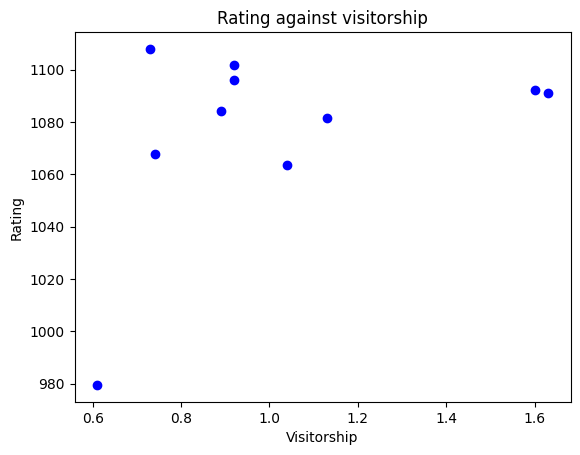

In [ ]:
plt.scatter(merged_results["visitors_mil"], merged_results["rating"], c ="blue")
plt.xlabel("Visitorship")
plt.ylabel("Rating")
plt.title("Rating against visitorship")

In [ ]:
correlation_coefficient, p_value = stats.pearsonr(merged_results["visitors_mil"], merged_results["rating"])

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation coefficient: 0.39908858911983636
P-value: 0.25325521894960146
